# The Second Part of the Assignment of IDS 2019-2020
Document your results as well as the way you obtained them in this jupyter notebook. Separate reports (pdf, word, etc.) are _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. *DO NOT CLEAR THE OUTPUT of the notebook you are submitting!* In the cases that the result of an algorithm is pdf, jpg, etc, you should attach the result to this notebook file and refer to that in the text.  

Next to the jupyter notebook, submit one zip-file containing all data sets that you are asked to submit. Make sure they are easily identifiable, i.e. use names as requested in the corresponding question.

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file and your created data sets in moodle.

Only <font color="red">one </font> group member should upload your group's solution.*Make sure to include group members' names and matriculation numbers*. If your name and student id are not included in the report, you will not receive any points!


Hint 1: While answering the questions, you will get a better and better impression of the given data. <font color="red"><b>Ensure that all claims you make are supported by the presented facts!</b></font>

Hint 2: <font color="red"><b>Some of the tasks might need some time to run. Take this into account in your planning.</b></font>

Hint 3: RWTHonline allows for multiple submissions (each submission overwrites the previous ones). <font color="red"><b>Partial submissions are possible and encouraged. </b></font> This helps in case of technical problems of RWTHonline, which do seldomly happen.

<font color="red"><b>Student Names and IDs:
    1. Muhammad Sajid Ali - 391708
    2. Shrey Gulati - 389902
    3. Yuchen Tao - 389901

## Preprocessing of the Dataset (5 points)

The provided data set *air_pollution* contains hourly results of measuring the concentration of certain substances (CO, Benzene, NO2, particulate matter) and environmental conditions (temperature, relative humidity, traffic volume). This data was collected near a busy street in a city center by an automated device.

 You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'air_pollution' dataset by random sampling. Use one of the group member's student number as a seed.
 - After completing this preprocessing step, export your final dataset as 'air_pollution_2.csv' dataset and use that for the next steps of the assignment.
 - If it is not directly mentioned, you should always use your extracted (above-created) dataset.
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [1]:
#your code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules as arule
import csv

In [2]:
dataf = pd.read_csv('Data/air_pollution.csv', sep=',')

In [3]:
dataf.head()

,Date,Time,CO,Benzene,NO2,Temperature,Humidity(%),Traffic_Volume,Particulate_Matter
0,10.03.04,23:00:00,1.2,4.7,96,11.2,59.2,30.002757,56.856288
1,10.03.04,22:00:00,1.6,6.5,116,11.2,59.6,26.908516,56.553333
2,10.03.04,19:00:00,2.0,9.4,92,13.3,47.7,25.117725,53.983221
3,10.03.04,18:00:00,2.6,11.9,113,13.6,48.9,48.598235,57.428567
4,10.03.04,21:00:00,2.2,9.2,122,11.0,60.0,41.038587,59.387427


In [4]:
len(dataf)

9357

In [6]:
#fetching 90% of data randomly
sample = dataf.sample(frac=0.9, replace=False, random_state=389902)
n = sample.shape
rows = n[0]
sample.sort_values(by=['Date','Time'], inplace=True)
sample.index = pd.RangeIndex(rows)
sample.head()

,Date,Time,CO,Benzene,NO2,Temperature,Humidity(%),Traffic_Volume,Particulate_Matter
0,01.01.05,0:00:00,-200.0,4.2,-200,8.2,40.1,NaN,NaN
1,01.01.05,10:00:00,1.2,4.7,97,4.7,57.2,NaN,NaN
2,01.01.05,11:00:00,1.7,5.4,113,6.8,48.6,NaN,NaN
3,01.01.05,14:00:00,2.4,8.9,153,10.9,35.9,NaN,NaN
4,01.01.05,15:00:00,2.2,7.9,147,12.5,32.3,NaN,NaN


In [7]:
len(sample)

8421

In [8]:
export_csv = sample.to_csv('Data/air_pollution_2.csv', index = None, header=True)

## Question 1 - Data Preprocessing and Data Quality (10 points)

For this question, use the extracted data set you created in the preprocessing step ('air_pollution_2.csv'), but without the features *Traffic_Volume* and *Particulate_Matter*. Remove those columns before answering the questions.

In [13]:
#import libraries and data set
sample = pd.read_csv('Data/air_pollution_2.csv', sep=',')
sample = sample.drop(['Traffic_Volume', 'Particulate_Matter'], axis=1)
export_csv = sample.to_csv('Data/air_pollution_3.csv', index = None, header=True)
sample.head()

,Date,Time,CO,Benzene,NO2,Temperature,Humidity(%)
0,01.01.05,0:00:00,-200.0,4.2,-200,8.2,40.1
1,01.01.05,10:00:00,1.2,4.7,97,4.7,57.2
2,01.01.05,11:00:00,1.7,5.4,113,6.8,48.6
3,01.01.05,14:00:00,2.4,8.9,153,10.9,35.9
4,01.01.05,15:00:00,2.2,7.9,147,12.5,32.3


(a) We want to get a first impression of the data. To achieve this, compute and show the following:
    - the column names (names of the features)
    - the data type of each feature
    - for time features: the minimum and maximum
    - for numerical (non-time) features: the mean, standard deviation, minimum and maximum
    - for categorical features: the number of classes and the value of the most frequent class

In [14]:
#your code
#generaing list of column names (names of the features)
list(sample.columns)

['Date', 'Time', 'CO', 'Benzene', 'NO2', 'Temperature', 'Humidity(%)']

In [15]:
#printing data type for each feature
sample.dtypes

Date            object
Time            object
CO             float64
Benzene        float64
NO2              int64
Temperature    float64
Humidity(%)    float64
dtype: object

In [16]:
#generating maximum for all features
sample.max()
#please see that since the date feature is of OBJECT type, the max value is incorrect. This will be fixed below when we convert
#it to datetime format

Date           31.12.04
Time            9:00:00
CO                 11.9
Benzene            63.7
NO2                 340
Temperature        44.6
Humidity(%)        88.7
dtype: object

In [17]:
#generating minimum for all features
sample.min()
#again observe the wrong minimum for date, this will be fixed upon column type change as discussed below

Date           01.01.05
Time            0:00:00
CO                 -200
Benzene            -200
NO2                -200
Temperature        -200
Humidity(%)        -200
dtype: object

In [18]:
#generating additional insights for columns other than date and time
print('The mean and standard deviation of column "CO" are', sample['CO'].mean(), 'and', sample['CO'].std(), 'respectively!')
print('The mean and standard deviation of column "Benzene" are', sample['Benzene'].mean(), 'and', sample['Benzene'].std(), 'respectively!')
print('The mean and standard deviation of column "NO2" are', sample['NO2'].mean(), 'and', sample['NO2'].std(), 'respectively!')
print('The mean and standard deviation of column "Temperature" are', sample['Temperature'].mean(), 'and', sample['Temperature'].std(), 'respectively!')
print('The mean and standard deviation of column "Humidity(%)" are', sample['Humidity(%)'].mean(), 'and', sample['Humidity(%)'].std(), 'respectively!')


The mean and standard deviation of column "CO" are -34.30437002731261 and 77.74834913521929 respectively!
The mean and standard deviation of column "Benzene" are 1.6348770929818321 and 42.006201677917886 respectively!
The mean and standard deviation of column "NO2" are 58.11138819617623 and 127.17262638775732 respectively!
The mean and standard deviation of column "Temperature" are 9.48330364564786 and 43.82451739065774 respectively!
The mean and standard deviation of column "Humidity(%)" are 39.18540553378438 and 51.90833364406061 respectively!


Observation: Since some of the values are non-physical (example, mean of CO concentration), we can comment that there are errors in the data which need to be fixed. This can also be seen by the non-physical values of all minimums. This fixing is done below.

(b) Consider the features 'date' and 'time'. Combine them into a new column 'Datetime' using the datetime data type, and drop the old columns 'date' and 'time'. 

Which of the two representations of date and time do you think is more suitable for most analysis applications?

Explanation: In our data originally, the date and time columns are of OBJECT type, which as we saw above, generate incorrect results during analysis since python doesn't interpret them as date and time. So converting them to Datetime datatype is certainly better! This conversion is being done by joining them together into one column but can also be done as 2 separate columns, depending on the type of analysis required. For most analysis however, a continuous time stamp is required and thus combining the 2 columns makes more sense.

In [19]:
#your code
#now we use parse_dates feature to merge date and time and drop the old columns date and time
sample= pd.read_csv('air_pollution_3.csv', sep=',', parse_dates=[['Date', 'Time']]) 
sample.head()

,Date_Time,CO,Benzene,NO2,Temperature,Humidity(%)
0,2004-03-26 01:00:00,1.4,4.8,91,9.7,61.6
1,2004-09-15 14:00:00,-200.0,16.1,-200,24.2,65.6
2,2005-12-02 17:00:00,3.7,17.1,227,11.1,52.0
3,2005-01-15 02:00:00,2.0,6.2,122,4.8,79.4
4,2004-09-06 11:00:00,2.8,17.6,159,34.7,25.9


(c) For each feature corresponding to a measured value, provide a simple scatter plot showing the data points over time. Can you spot any obvious data quality issues, e.g. inconsistencies, implausible values or missing values (without researching on specific domain knowledge)?

*Hint: you may perform additional computations to verify your findings.*

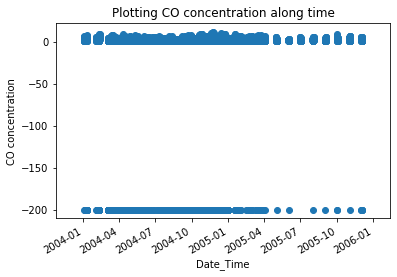

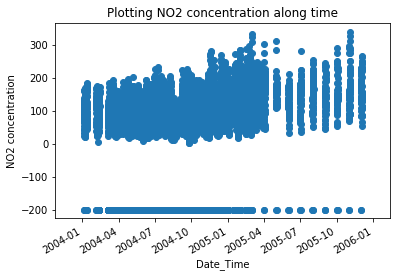

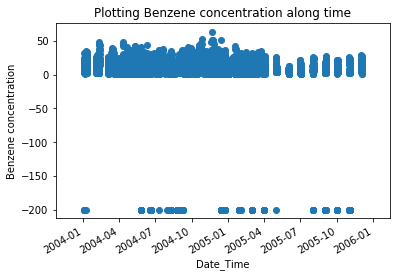

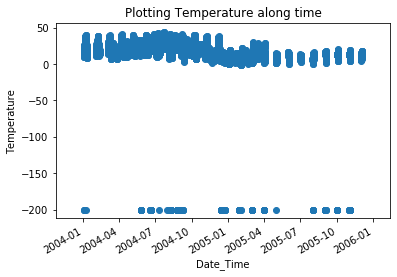

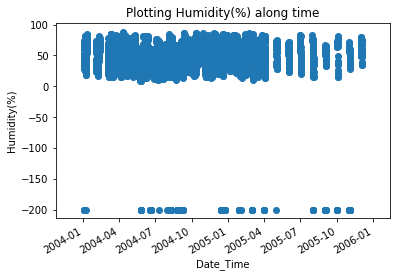

In [21]:
#your code
register_matplotlib_converters()

dates = sample['Date_Time']
values = sample['CO']
# Plot
plt.scatter(dates, values)
plt.gcf().autofmt_xdate()
plt.title('Plotting CO concentration along time')
plt.xlabel('Date_Time')
plt.ylabel('CO concentration')
plt.show()

values = sample['NO2']
# Plot
plt.scatter(dates, values)
plt.gcf().autofmt_xdate()
plt.title('Plotting NO2 concentration along time')
plt.xlabel('Date_Time')
plt.ylabel('NO2 concentration')
plt.show()

values = sample['Benzene']
# Plot
plt.scatter(dates, values)
plt.gcf().autofmt_xdate()
plt.title('Plotting Benzene concentration along time')
plt.xlabel('Date_Time')
plt.ylabel('Benzene concentration')
plt.show()

values = sample['Temperature']
# Plot
plt.scatter(dates, values)
plt.gcf().autofmt_xdate()
plt.title('Plotting Temperature along time')
plt.xlabel('Date_Time')
plt.ylabel('Temperature')
plt.show()

values = sample['Humidity(%)']
# Plot
plt.scatter(dates, values)
plt.gcf().autofmt_xdate()
plt.title('Plotting Humidity(%) along time')
plt.xlabel('Date_Time')
plt.ylabel('Humidity(%)')
plt.show()


Explanation: We can see clearly non-physical values at -200 for concentrations as well as temperature and humidity. If these problems were only in concentrations, we could have thought about the instrument trying to show zero. However, since temperature and humidity also have faulty values at the same number, we can conclude that the values of -200 are incorrect readings and cannot be directly substituted by another value. These either need to be removed or set to average over surrounding values. 

(d) We need to handle any implausible or missing data. In the lecture, several strategies to do so have been introduced, for example, deleting data rows that contain missing/implausible values or replacing them by a value derived from other data points. 

In this question, consider implausible values to be the ones identified in question (c).

    1) For all numerical features, compute and show mean, standard deviation, minimum and maximum, while ignoring the missing and implausible values. Also, print the total number of data rows.
    
    2) Choose a strategy (or combination of strategies) to handle missing/implausible values. Create a cleaned data set with all those values handled accordingly.
    
    3) For all numerical features, compute and show mean, standard deviation, minimum and maximum with respect to your cleaned data set. Also print the total number of data rows.
    
    4) Motivate and explain your strategy and describe its (dis-)advantages compared to other options. Compare the computed statistical values before and after cleaning and briefly describe and evaluate any changes.

In [22]:
#PART 1 : first we analyze the rows separately ignoring implausible values, ie. removing negative values. 
#Missing values are not a problem for the given case of concentrations, temperature and humidity

CO = sample['CO']
NO2 = sample['NO2']
benzene = sample['Benzene']
temp = sample['Temperature']
hum = sample['Humidity(%)']

n = sample.shape
rows = n[0]

print('The initial number of datapoints are:', rows)


CO_new = [num for num in CO if num >= 0]
NO2_new = [num for num in NO2 if num >= 0]
ben_new = [num for num in benzene if num >= 0]
T_new = [num for num in temp if num >= 0]
hum_new = [num for num in hum if num >= 0]

print('New number of datapoints for CO are', len(CO_new))
print('New number of datapoints for NO2 are', len(NO2_new))
print('New number of datapoints for Benzene are', len(ben_new))
print('New number of datapoints for Temperature are', len(T_new))
print('New number of datapoints for Humidity(%) are', len(hum_new),'\n')

#now converting to series for analysis
CO_new = pd.Series(CO_new)
NO2_new = pd.Series(NO2_new)
ben_new = pd.Series(ben_new)
T_new = pd.Series(T_new)
hum_new = pd.Series(hum_new)

print('Statistics from Filtered Data:\n')
print('Feature        ', 'Mean                 ','Standard Deviation      ','Maximum       ','Minimum')
print('CO            ', CO_new.mean(),'      ', CO_new.std() ,'        ',CO_new.max()  ,'         ',CO_new.min())
print('NO2            ', NO2_new.mean(),'      ', NO2_new.std() ,'        ',NO2_new.max()  ,'         ',NO2_new.min())
print('Benzene        ', ben_new.mean(),'      ', ben_new.std() ,'        ',ben_new.max()  ,'         ',ben_new.min())
print('Temperature    ', T_new.mean(),'      ', T_new.std() ,'        ',T_new.max()  ,'         ',T_new.min())
print('Humidity(%)   ', hum_new.mean(),'      ', hum_new.std() ,'        ',hum_new.max()  ,'         ',hum_new.min())




The initial number of datapoints are: 8421
New number of datapoints for CO are 6902
New number of datapoints for NO2 are 6938
New number of datapoints for Benzene are 8081
New number of datapoints for Temperature are 8068
New number of datapoints for Humidity(%) are 8081 

Statistics from Filtered Data:

Feature         Mean                  Standard Deviation       Maximum        Minimum
CO             2.1621124311793745        1.461812727369351          11.9           0.1
NO2             113.2827904295186        48.410650247637335          340           2
Benzene         10.118463061502306        7.482777960347633          63.7           0.1
Temperature     18.32790034705007        8.756373015198214          44.6           0.2
Humidity(%)    49.24889246380392        17.298354642567695          88.7           9.2


Part 2: Choosing a method
We see above that since ignoring the impractical values (filtered by the negative), we get reliable statistics for concentrations, temperature and humidity. So we will use the method of removing these outlying values before conducting the analysis.
The code and new analysis can be seen below.

In [23]:
#creating new dataset by removing negative outliers for all features
clean_data = sample

for i in range(rows):
    if clean_data['CO'][i] < 0 or clean_data['NO2'][i] < 0 or clean_data['Benzene'][i] < 0 or clean_data['Temperature'][i] <0 or clean_data['Humidity(%)'][i] < 0:
        clean_data = clean_data.drop(i)

x = clean_data.shape

clean_rows = x[0]

remove_count = rows - clean_rows
print('The total number of data rows in the cleaned dataset are:',clean_rows)

The total number of data rows in the cleaned dataset are: 6223


In [24]:
#Part 3 - New Analysis
CO_new = clean_data['CO']
NO2_new = clean_data['NO2']
ben_new = clean_data['Benzene']
T_new = clean_data['Temperature']
hum_new = clean_data['Humidity(%)']

print('Statistics from Cleaned Data:\n')
print('Feature        ', 'Mean                 ','Standard Deviation      ','Maximum       ','Minimum')
print('CO            ', CO_new.mean(),'      ', CO_new.std() ,'        ',CO_new.max()  ,'         ',CO_new.min())
print('NO2            ', NO2_new.mean(),'      ', NO2_new.std() ,'        ',NO2_new.max()  ,'         ',NO2_new.min())
print('Benzene        ', ben_new.mean(),'      ', ben_new.std() ,'        ',ben_new.max()  ,'         ',ben_new.min())
print('Temperature    ', T_new.mean(),'      ', T_new.std() ,'        ',T_new.max()  ,'         ',T_new.min())
print('Humidity(%)   ', hum_new.mean(),'      ', hum_new.std() ,'        ',hum_new.max()  ,'         ',hum_new.min(),'\n')


print('Comparison with Original Data:\n')
print('Feature        ', 'Mean                 ','Standard Deviation      ','Maximum       ','Minimum')
print('CO            ', CO.mean(),'      ', CO.std() ,'        ',CO.max()  ,'         ',CO.min())
print('NO2            ', NO2.mean(),'      ', NO2.std() ,'        ',NO2.max()  ,'         ',NO2.min())
print('Benzene        ', benzene.mean(),'      ', benzene.std() ,'        ',benzene.max()  ,'         ',benzene.min())
print('Temperature    ', temp.mean(),'      ', temp.std() ,'        ',temp.max()  ,'         ',temp.min())
print('Humidity(%)   ', hum.mean(),'      ', hum.std() ,'        ',hum.max()  ,'         ',hum.min())


Statistics from Cleaned Data:

Feature         Mean                  Standard Deviation       Maximum        Minimum
CO             2.193395468423596        1.4470810217144139          11.9           0.1
NO2             114.08082918206652        47.4765778977213          333           2
Benzene         10.59673790776153        7.493168899995409          63.7           0.2
Temperature     17.71934758155233        8.766136065691025          44.6           0.2
Humidity(%)    48.96165836413291        17.46396350100762          88.7           9.2 

Comparison with Original Data:

Feature         Mean                  Standard Deviation       Maximum        Minimum
CO             -34.30437002731264        77.74834913521923          11.9           -200.0
NO2             58.11138819617623        127.17262638775726          340           -200
Benzene         1.6348770929818266        42.00620167791784          63.7           -200.0
Temperature     9.483303645647814        43.82451739065771     

Part 4 - Explanation:
The stratergy used here to remove all outlying values can be justified by its perfect reliability! The advantage of this method is that the data obtained after removing outliers is exact (not interpolated) and thus fully reliable. The disadvantage is that the total amount of data is reduced. An improvement to this can be to split the dataset and remove outliers from each column individually, however for our case of analyzing air it is best to keep all pollutant data together. Also, since this is sensitive information and subject to unforeseen and sudden fluctuations, using interpolation or averaging to replace the non-physical values is very likely to generate unreliable values which can critically hamper the analysis from this data.

Changes after cleaning the data: See above the comparison of clean data with original data. The original data instantly shows significant problems including non-physical values of minimums as well as for the average of CO and very high standard deviation of all columns. After removing the outliers, as expected, the minimums are accurately reflected, means have shifted towards higher values since all negative (corrupt/non-physical) values have been removed. Also, the standard deviation of all data columns is fixed and accurately represents the variation in data.

## Question 2 - Data Preprocessing  and Advanced Visualization (15 points)

For this question, use the extracted data set you created in the preprocessing step ('air_pollution_2.csv').

(a) To create a suitable input for the following questions, modify the data set as listed below and then print the first 5 data rows:

    - Remove the columns 'Traffic_Volume' and 'Particulate_Matter'
    - Replace the columns 'Date' and 'Time' by a combined column 'Datetime' using the datetime data type
    - Restrict the data to the timeframe between 2004-04-01 and 2005-03-31
    - Drop all rows that contain a missing value or a value below -37
    
*Hint: You may be able to reuse some of your code or data sets created above.*

In [25]:
data_processed_new = pd.read_csv('Data/air_pollution_2.csv')

In [27]:
#your code

# Removing the columns 'Traffic_Volume' and 'Particulate_Matter'
data_processed_new = data_processed_new.drop(["Traffic_Volume","Particulate_Matter"],axis=1)

In [28]:
data_processed_new.head()

,Date,Time,CO,Benzene,NO2,Temperature,Humidity(%)
0,01.01.05,0:00:00,-200.0,4.2,-200,8.2,40.1
1,01.01.05,10:00:00,1.2,4.7,97,4.7,57.2
2,01.01.05,11:00:00,1.7,5.4,113,6.8,48.6
3,01.01.05,14:00:00,2.4,8.9,153,10.9,35.9
4,01.01.05,15:00:00,2.2,7.9,147,12.5,32.3


In [29]:
# Replacing the columns 'Date' and 'Time' by a combined column 'Datetime' using the datetime data type
data_processed_new['Datetime'] = pd.to_datetime(data_processed_new['Date'] + ' ' + data_processed_new['Time'])

In [30]:
data_processed_new.head()

,Date,Time,CO,Benzene,NO2,Temperature,Humidity(%),Datetime
0,01.01.05,0:00:00,-200.0,4.2,-200,8.2,40.1,2005-01-01 00:00:00
1,01.01.05,10:00:00,1.2,4.7,97,4.7,57.2,2005-01-01 10:00:00
2,01.01.05,11:00:00,1.7,5.4,113,6.8,48.6,2005-01-01 11:00:00
3,01.01.05,14:00:00,2.4,8.9,153,10.9,35.9,2005-01-01 14:00:00
4,01.01.05,15:00:00,2.2,7.9,147,12.5,32.3,2005-01-01 15:00:00


In [31]:
# To restrict the data to the timeframe between 2004-04-01 and 2005-03-31
mask = (data_processed_new['Datetime'] > '2004-06-01') & (data_processed_new['Datetime'] <= '2005-03-01')

In [32]:
len(data_processed_new)

8421

In [33]:
len(mask)

8421

In [34]:
data_processed_new = data_processed_new.loc[mask]

In [35]:
# Restricted data
len(data_processed_new)

5141

In [63]:
data_processed_new.head()

,Date,Time,CO,Benzene,NO2,Temperature,Humidity(%),Datetime
1,01.01.05,10:00:00,1.2,4.7,97,4.7,57.2,2005-01-01 10:00:00
2,01.01.05,11:00:00,1.7,5.4,113,6.8,48.6,2005-01-01 11:00:00
3,01.01.05,14:00:00,2.4,8.9,153,10.9,35.9,2005-01-01 14:00:00
4,01.01.05,15:00:00,2.2,7.9,147,12.5,32.3,2005-01-01 15:00:00
5,01.01.05,16:00:00,2.1,7.7,139,12.8,32.6,2005-01-01 16:00:00


In [36]:
data_processed_new.describe()

,CO,Benzene,NO2,Temperature,Humidity(%)
count,5141.000000,5141.000000,5141.000000,5141.000000,5141.000000
mean,-34.710562,1.441471,57.185567,9.791441,38.870745
std,78.053121,42.026993,126.404145,44.098802,51.951764
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,3.800000,50.000000,9.800000,34.000000
50%,1.400000,7.600000,95.000000,17.900000,47.800000
75%,2.500000,13.500000,132.000000,25.100000,61.200000
max,11.900000,63.700000,295.000000,44.600000,87.100000


In [64]:
# Removing missing values
# CO, Benzene, Humidty% having negative value doesn't make sence and hence dropped
# Temperature below -37 is dropped
data_processed_new = data_processed_new[data_processed_new['CO'] >= 0]
data_processed_new = data_processed_new[data_processed_new['Benzene'] >= 0]
data_processed_new = data_processed_new[data_processed_new['Temperature'] >= -37]
data_processed_new = data_processed_new[data_processed_new['Humidity(%)'] >= 0]

In [65]:
len(data_processed_new)

4015

In [66]:
# Removing NaN values if any
data_processed_new.dropna(inplace=True)

In [67]:
len(data_processed_new)

4015

In [68]:
data_processed_new.describe()

,CO,Benzene,NO2,Temperature,Humidity(%)
count,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000
mean,2.106326,10.172877,95.734247,18.113026,48.830760
std,1.464935,7.626093,85.329175,9.689984,17.596447
min,0.100000,0.200000,-200.000000,-1.900000,9.600000
25%,1.000000,4.400000,68.000000,10.100000,35.400000
50%,1.700000,8.200000,106.000000,17.700000,48.600000
75%,2.800000,14.200000,139.000000,25.000000,61.800000
max,11.900000,63.700000,295.000000,44.600000,87.100000


(b) For temperature, humidity and CO compute the mean value for each month. Create two stream graphs based on this newly computed data, that visualize the change in temperature, CO and humidity over the months:

    1) For the first stream graph, simply use the mean values you computed for each month.
    
    2) For the second stream graph, first normalize the computed mean values by mapping them individually to an interval between 0 and 1, that is, apply Min-max normalization.

In [42]:
# Taking the monthly mean
data_monthly_mean = data_processed_new.groupby(by=[data_processed_new['Datetime'].dt.month]).mean()

In [43]:
data_monthly_mean

,CO,Benzene,NO2,Temperature,Humidity(%)
Datetime,,,,,
1,1.913462,8.519952,127.278846,7.062019,50.781250
2,1.898826,6.880516,132.845070,7.537559,52.434038
6,1.888694,10.223587,73.485380,25.435673,42.046394
7,1.895508,10.462884,78.215130,26.436170,38.171158
8,1.591789,8.269208,62.152493,26.020235,42.583578
9,2.218124,11.836034,85.855011,23.029851,46.185714
10,2.417536,12.891943,84.590047,20.973697,57.457109
11,2.533507,11.668924,110.043403,14.230729,54.747222
12,2.374592,9.710023,101.417249,13.105594,53.412587


In [44]:
# Creating the data for the stream graph
x = data_monthly_mean.index

In [45]:
CO = data_monthly_mean['CO']
temp = data_monthly_mean['Temperature']
hum = data_monthly_mean['Humidity(%)']

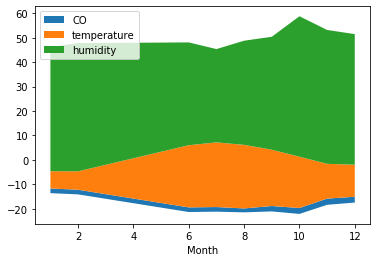

In [46]:
y = np.vstack([CO,temp,hum])

# the labels for y1, y2 and y3
labels = ["CO", "temperature", "humidity"]

fig, ax = plt.subplots()
#modifying the axis
ax.stackplot(x, CO, temp, hum, labels=labels, baseline='wiggle')
ax.legend(loc='upper left')
plt.xlabel('Month')
plt.show()

Normalizing the data for the second shream graph

In [47]:
#creating the scaler
min_max_scaler = preprocessing.MinMaxScaler((0,1)) 

#fitting the scaler to the data
min_max_scaler.fit(data_monthly_mean)

#transforming the data to the defined new range
transformed_data = min_max_scaler.transform(data_monthly_mean)

In [48]:
transformed_data = pd.DataFrame(transformed_data)

In [49]:
# Naming columns
transformed_data = transformed_data.rename(columns={0:'CO',1:'Benzene',2:'NO2',3:'Temperature',4:'Humidity(%)'})

In [50]:
transformed_data

,CO,Benzene,NO2,Temperature,Humidity(%)
0,0.341581,0.272720,0.921262,0.000000,0.653849
1,0.326040,0.000000,1.000000,0.024545,0.739548
2,0.315280,0.556119,0.160312,0.948359,0.200936
3,0.322516,0.595926,0.227218,1.000000,0.000000
4,0.000000,0.231009,0.000000,0.978531,0.228789
5,0.665098,0.824350,0.335290,0.824182,0.415564
6,0.876851,1.000000,0.317396,0.718054,1.000000
7,1.000000,0.796551,0.677453,0.370014,0.859489
8,0.831250,0.470688,0.555430,0.311940,0.790287


In [51]:
CO = transformed_data['CO']
temp = transformed_data['Temperature']
hum = transformed_data['Humidity(%)']

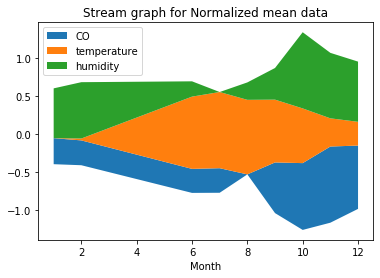

In [52]:
y = np.vstack([CO,temp,hum])
# the labels for y1, y2 and y3
labels = ["CO", "temperature", "humidity"]

fig, ax = plt.subplots()
#modifying the axis
ax.stackplot(x, CO, temp, hum, labels=labels, baseline='wiggle')
ax.legend(loc='upper left')
plt.xlabel('Month')
plt.title('Stream graph for Normalized mean data')
plt.show()

(c) Answer the following questions based on the stream graphs created in question 2(a) and briefly explain how you derived the answer. Which of the two stream graphs do you consider more adequate to obtain the answers?

    1) In which month is the average CO lowest?
    Ans: The average CO is the lowest in August. We can clearly see from the stream graph from normalized mean data above that the lowest average CO is in October (where the value is 0 for normalized data).
    
    2) Is there any correlation between humidity and CO?
    Ans: It is hard to find the exact corelation between humidity and CO from either of the stream graphs.
    
    3) Between which months is temperature increasing?
    Ans: The temperature increase in the months from January to August (August having the hishest average temperature) and then reduces till the next January. This can be clearly seen in the stream graph from normalized mean data above where the stream thicken from January to August and gets thinner thereafter.
    
    

(d) We want to create a heat map that visualizes the CO measured for different combinations of humidity and temperature. 
The heatmap should have 12 columns and 12 rows. The shown CO value should be the *median* of all values for the combination of humidity and temperature.

Modify the data as needed. Use a binning strategy of your choice for converting numerical data to categorical data. Motivate and explain all your choices and modifications.

In [9]:
#your code

In [84]:
# Temperature is split into 12 bins
#names = ['1/12','2/12','3/12','4/12','5/12','6/12','7/12','8/12','9/12','10/12','11/12','12/12']
df = pd.cut(data_processed_new['Temperature'],12)#, labels=names)

In [85]:
# Humidity(%) is split into 12 bins
#names2 = ['1/12','2/12','3/12','4/12','5/12','6/12','7/12','8/12','9/12','10/12','11/12','12/12']
df2 = pd.cut(data_processed_new['Humidity(%)'],12)#, labels=names2)

In [86]:
# concatenate the temperature, humidity(%) and CO values and group the Temperature and Humidity(%) values 
# with the mean of CO
result = pd.concat([df, df2,data_processed_new['CO']], axis=1, sort=False)
grouped = result.groupby(['Temperature','Humidity(%)']).median()

In [87]:
# creating the axis and values required to create the heat map
temp = grouped
axis = (grouped.index).to_frame()
new = axis[['Temperature', 'Humidity(%)']].copy()
new.reset_index(drop=True, inplace=True)
temp.reset_index(drop=True, inplace=True)
heat_map_input = pd.concat([new,temp], axis=1, sort=False)
heat_map_input["CO"] = pd.to_numeric(heat_map_input["CO"])

(e) Use the modified data to create a heat map as specified in question part (d). Answer the following questions based on that heat map and briefly explain how you derived your answer:



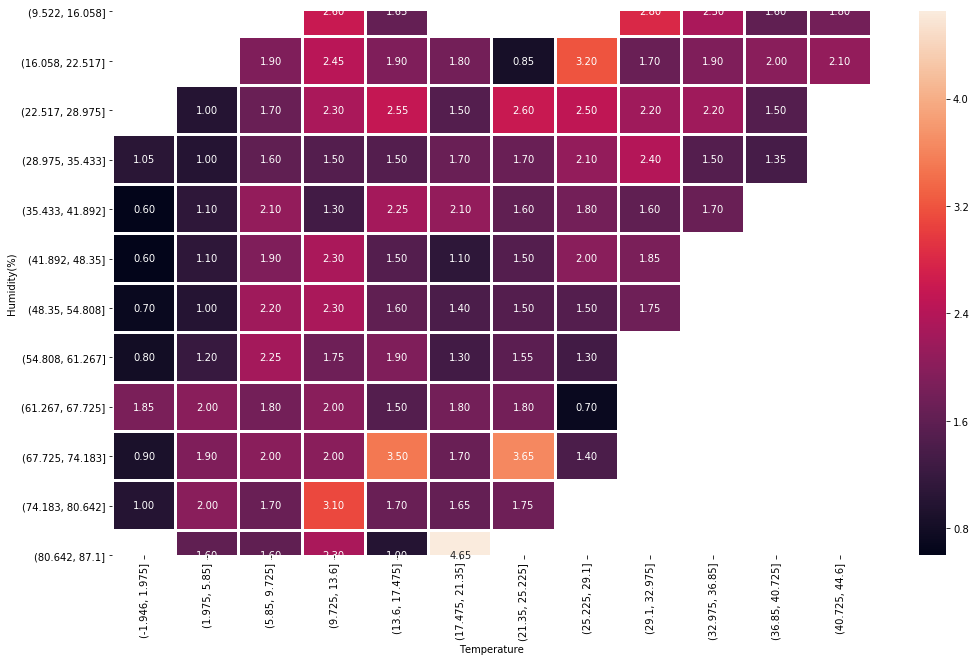

In [89]:
# Pivotting the data and plotting the heat map
pivotted= heat_map_input.pivot('Humidity(%)','Temperature','CO')
f, ax = plt.subplots()
sns.heatmap(pivotted, annot=True, fmt="0.2f", linewidths=2,ax=ax)

Explanation:    
    
    1) For which combination of humidity and temperature values is the median CO highest? 
    Ans: The median CO is the highest(4.65) when the temperature is in the range of 17.475-21.35 and the humidity(%) is in the range of 80.642-87.1.
    
    2) How do you explain empty fields in your heat map?
    Ans: The empty field represent NaN values. In our current data set we do not have data for these specific temperature-Humidity combinations.
    
    3) Is CO correlating with temperature, humidity, or both?
    Ans: It can be clearly seen that CO correlates with tempearure as they CO increases with increased temperature. However, we do not see a clear correlation between humidity(%) and CO.

## Question 3 - Clustering (15 points): 

(a) For this question, use the extracted data set you created in the preprocessing step ('air_pollution_2.csv'). Use a scatter diagram to find the relation between the 'Traffic_Volume' and 'Particulate_Matter' columns.

Text(0, 0.5, 'Particulate Matter')

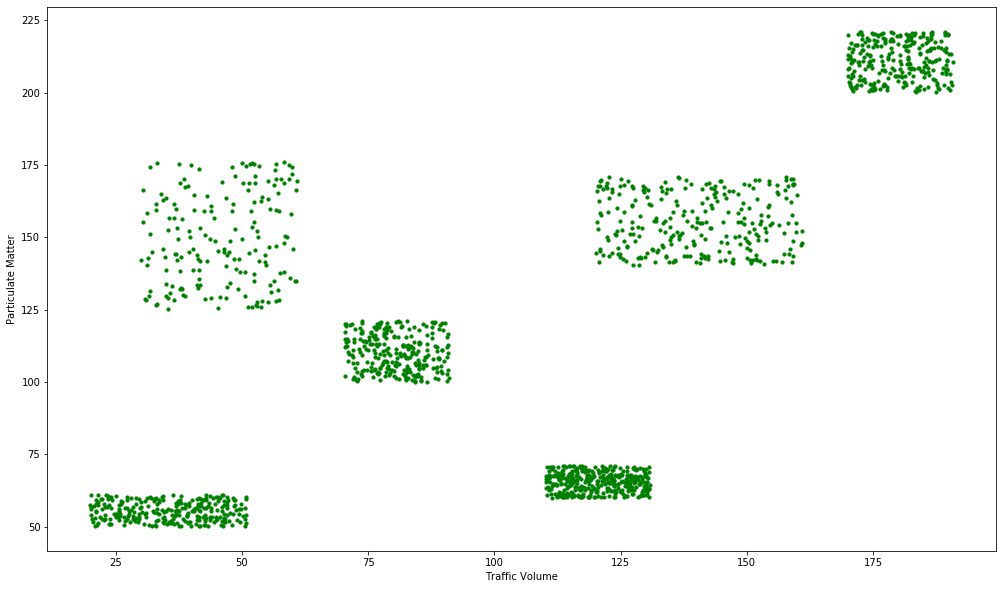

In [53]:
#Your code
sample= pd.read_csv('air_pollution_2.csv', sep=',', parse_dates=[['Date', 'Time']]) 

traffic = sample['Traffic_Volume'].values
pm= sample['Particulate_Matter'].values

# Draw a scatter diagram for showing the distribution of data item in variable 'information' 

plt.rcParams['figure.figsize'] = (17, 10)
plt.scatter(traffic, pm, c='green', s =10)
plt.xlabel('Traffic Volume')
plt.ylabel('Particulate Matter')

(b) From the previous question you found the relationship between two columns which are suitable for applying clustering methods. Find the two arrays corresponding to these to columns and drop nan values from them. Apply the k_means method for clustering the two mentioned columns. Use three different number of clusters for classifying.

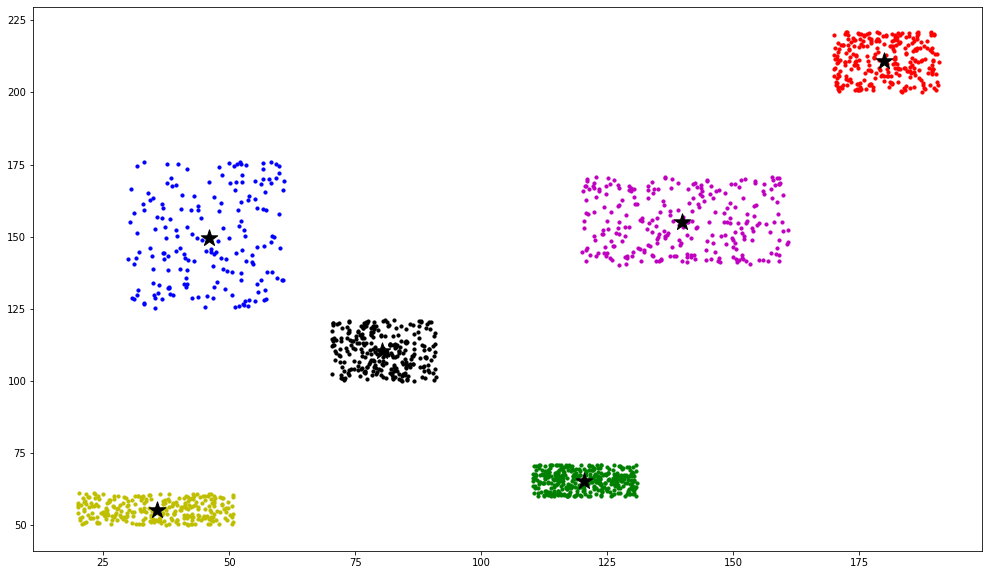

In [54]:
# Your code
#First removing all NaN values from the 2 columns
sample = sample.dropna()
#now we have the dataset with NaN values removed 
#(these were only in the last 2 columns and nowhere else - we saw this in section 1 above)

#now applying k-means method - first it is obvious from the above plot that there are 6 clear clusters, so we start with that
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

#generating new columns after removing NaN values
traffic = sample['Traffic_Volume'].values
pm= sample['Particulate_Matter'].values

cluster_data = np.array(list(zip(traffic, pm)))
#Define 'cluster_num' for for number of clusters.

cluster_num = 6
kmeans = KMeans(cluster_num).fit(cluster_data)
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

fig, plots = plt.subplots()
colors = ['r', 'g', 'b', 'y', 'm','k']
for cluster_index in range(cluster_num) :
    sub_set = np.array([cluster_data[i] for i in range(len(cluster_data)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
plots.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 300, c = 'k')


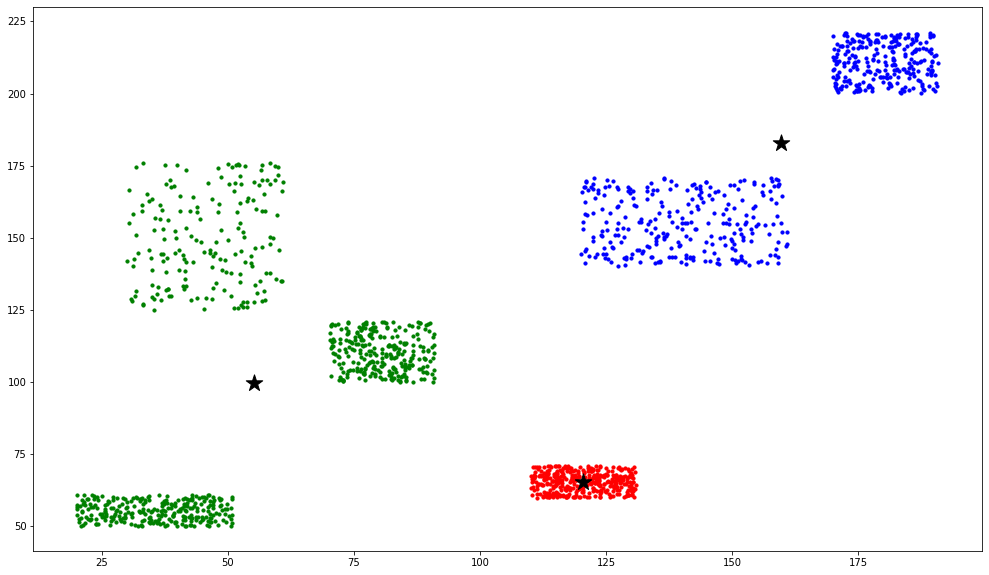

In [55]:
#now we repeat with different number of clusters - say 3
cluster_num = 3
kmeans = KMeans(cluster_num).fit(cluster_data)
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

fig, plots = plt.subplots()
colors = ['r', 'g', 'b', 'y', 'm','k']
for cluster_index in range(cluster_num) :
    sub_set = np.array([cluster_data[i] for i in range(len(cluster_data)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
plots.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 300, c = 'k')


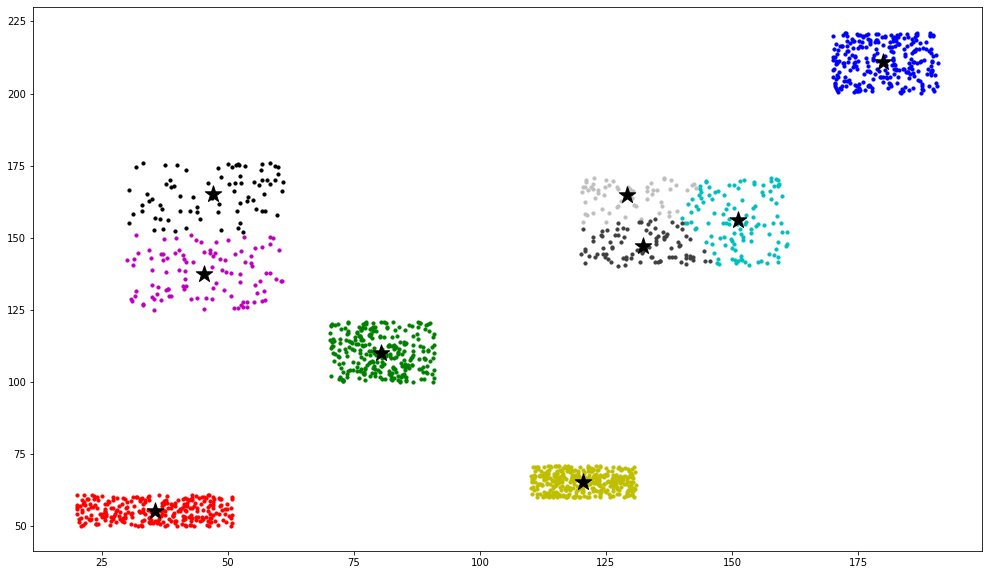

In [56]:
#let us also try with a higher number of clusters
cluster_num = 9
kmeans = KMeans(cluster_num).fit(cluster_data)
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

fig, plots = plt.subplots()
colors = ['0.75','r', 'g', 'b', 'y', 'm','k', 'c','0.25']
for cluster_index in range(cluster_num) :
    sub_set = np.array([cluster_data[i] for i in range(len(cluster_data)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
plots.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 300, c = 'k')


(c) Apply the DBSCAN method for clustering the two mentioned columns. Use three different eps and min_samples for clustering.

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8]


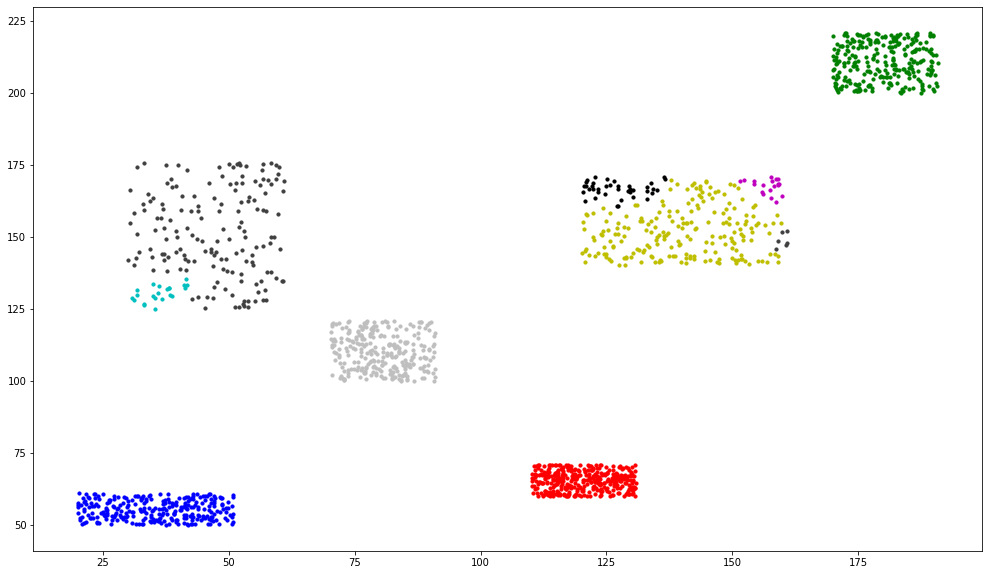

In [57]:
# Your code
#Define 'eps' variable 4 and min_samples varibale 20.

dbscan = DBSCAN(eps = 5, min_samples=15).fit(cluster_data)
clusters = dbscan.labels_
cluster_indexs = np.unique(clusters).tolist()
print(cluster_indexs)

fig, plots = plt.subplots()
colors = ['0.75','r', 'g', 'b', 'y', 'm','k', 'c','0.25']
for cluster_index in cluster_indexs :
    sub_set = np.array([cluster_data[i] for i in range(len(cluster_data)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])


[0, 1, 2, 3, 4, 5]


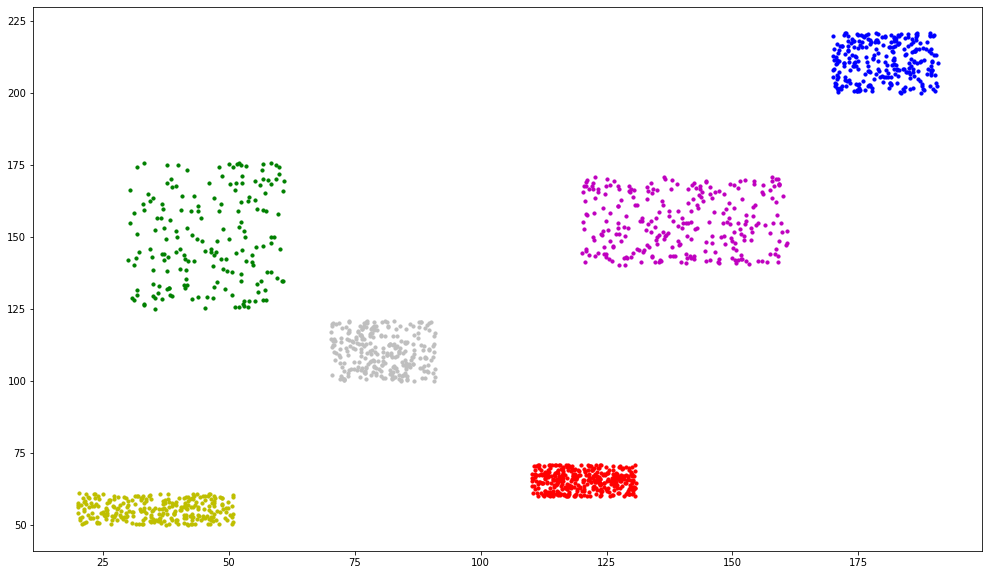

In [58]:
#see above that setting a low value for eps generates extra clusters. Let us try and fix that by increasing eps and min. samples
dbscan = DBSCAN(eps = 10, min_samples=20).fit(cluster_data)
clusters = dbscan.labels_
cluster_indexs = np.unique(clusters).tolist()
print(cluster_indexs)

fig, plots = plt.subplots()
colors = ['0.75','r', 'g', 'b', 'y', 'm','k', 'c','0.25']
for cluster_index in cluster_indexs :
    sub_set = np.array([cluster_data[i] for i in range(len(cluster_data)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])

[0, 1, 2, 3]


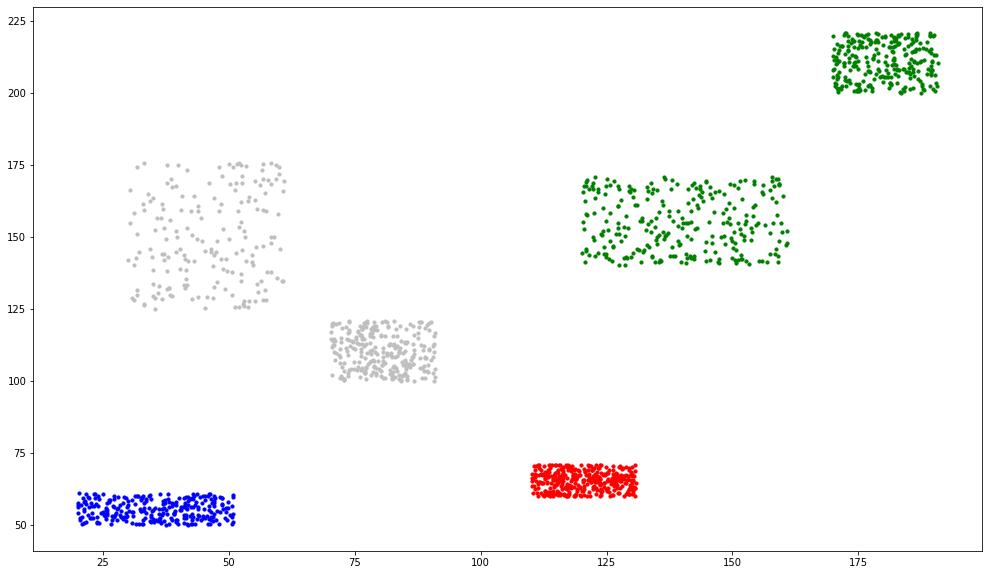

In [59]:
#see above that the increased value gives a better clustering. Let us see what happens when eps and min sample count
#is increased further
dbscan = DBSCAN(eps = 35, min_samples=100).fit(cluster_data)
clusters = dbscan.labels_
cluster_indexs = np.unique(clusters).tolist()
print(cluster_indexs)

fig, plots = plt.subplots()
colors = ['0.75','r', 'g', 'b', 'y', 'm','k', 'c','0.25']
for cluster_index in cluster_indexs :
    sub_set = np.array([cluster_data[i] for i in range(len(cluster_data)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])

(d) Compare k_means and DBSCAN results. Which of these methods is more suitable for clustering this data? Why?

Explanation: For the given set of data, we did an initial vizualization through a scatter plot. We saw that the data is well organized and localized with no/minimum outliers or noise. Hence, we were directly able to start with 6 number of clusters in k-means and obtain a very accurate,reliable clustering. Upon reducing the nuber of clusters, we observed that the new clusters aren't very accurate, but we wouldn't do this in practice for the given data since the obvious choice of the cluster count is visible. While DBSCAN also managed to give us the same output for a value of eps and min. samples, we had to tweak the parameters to obtain a reliable result, and a direct coleration between DBSCAN parameters and accurate clustering is not possible. This can be seen for the unreliable clustering result at a low value of eps and min. samples (plot 1 of DBSCAN above).

So for the given dataset with well organized data and no noise/outliers, k-means is easily the better choice since it is very intuitive and we can set the best/optimum k-means parameters as inputs just by looking at the initial data plot.

(e) Add noise to the two mentioned columns. For adding noise, first find the range of these two columns and add a random number of 30 samples of noise in the range of each column to that. Plot the scatter diagram again.
Repeat k_means and DBSCAN algorithms for clustering. Which of these methods is more suitable for clustering this data? Why?

Text(0, 0.5, 'Particulate Matter Noisy Data')

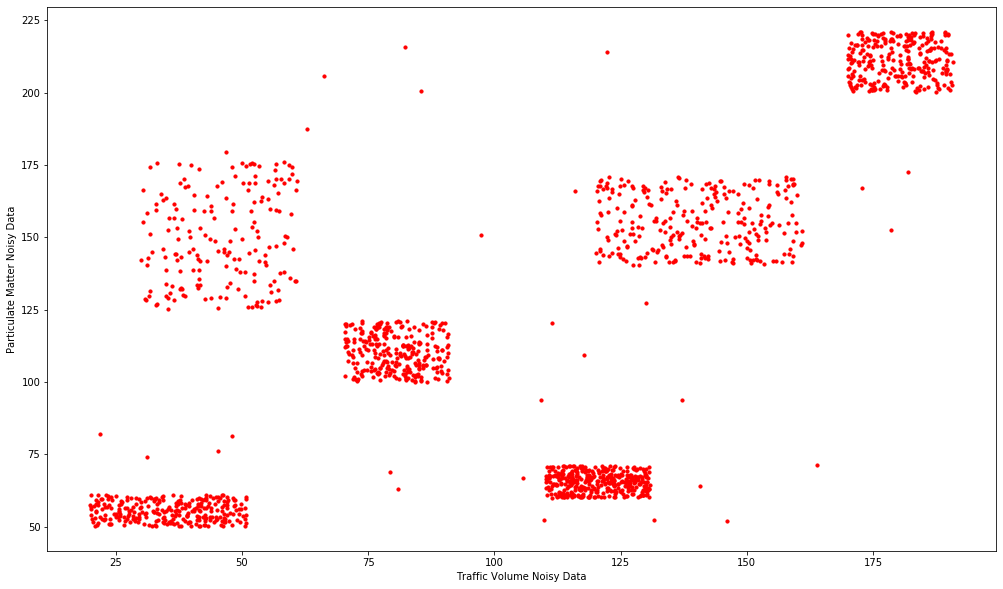

In [60]:
#Adding noise to the data

tr_min = sample['Traffic_Volume'].min()
pm_min= sample['Particulate_Matter'].min()

tr_max = sample['Traffic_Volume'].max()
pm_max= sample['Particulate_Matter'].max()


traffic_noise = np.random.uniform(low=tr_min, high=tr_max, size=30).tolist()
pm_noise = np.random.uniform(low=pm_min, high=pm_max, size=30).tolist()
traffic_noisy = np.concatenate((traffic, traffic_noise), axis=None)
pm_noisy = np.concatenate((pm, pm_noise), axis=None)

#plotting noisy data
plt.rcParams['figure.figsize'] = (17, 10)
plt.scatter(traffic_noisy, pm_noisy, c='red', s =10)
plt.xlabel('Traffic Volume Noisy Data')
plt.ylabel('Particulate Matter Noisy Data')


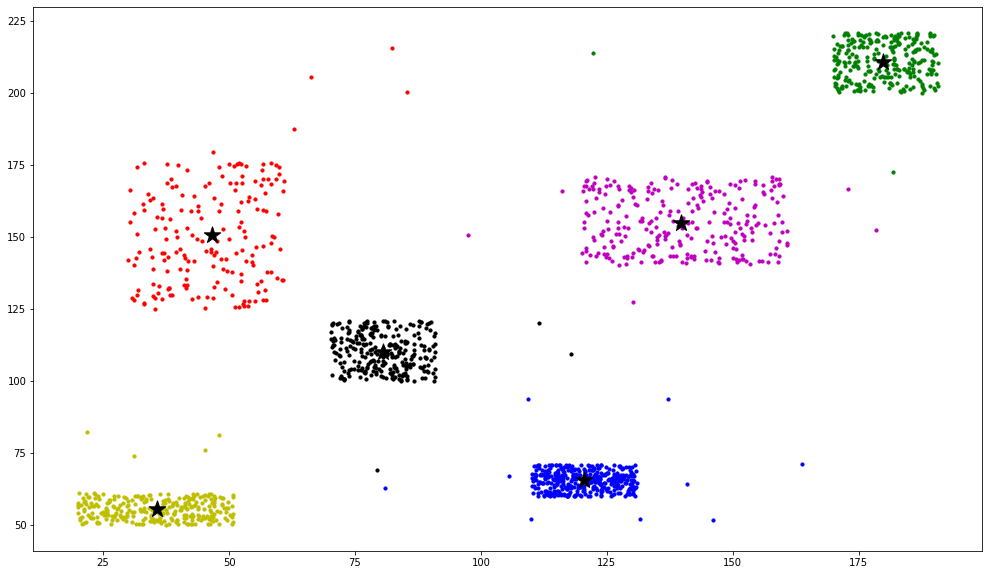

In [61]:
#let us now repeat Kmeans and DBSCAN with the same parameters from above that genearted the best results 
#out of the 3 cases and see what happens

#K-means
cluster_data = np.array(list(zip(traffic_noisy, pm_noisy)))
#Define 'cluster_num' for for number of clusters.

cluster_num = 6
kmeans = KMeans(cluster_num).fit(cluster_data)
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

fig, plots = plt.subplots()
colors = ['r', 'g', 'b', 'y', 'm','k']
for cluster_index in range(cluster_num) :
    sub_set = np.array([cluster_data[i] for i in range(len(cluster_data)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
plots.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 300, c = 'k')



[-1, 0, 1, 2, 3, 4, 5]


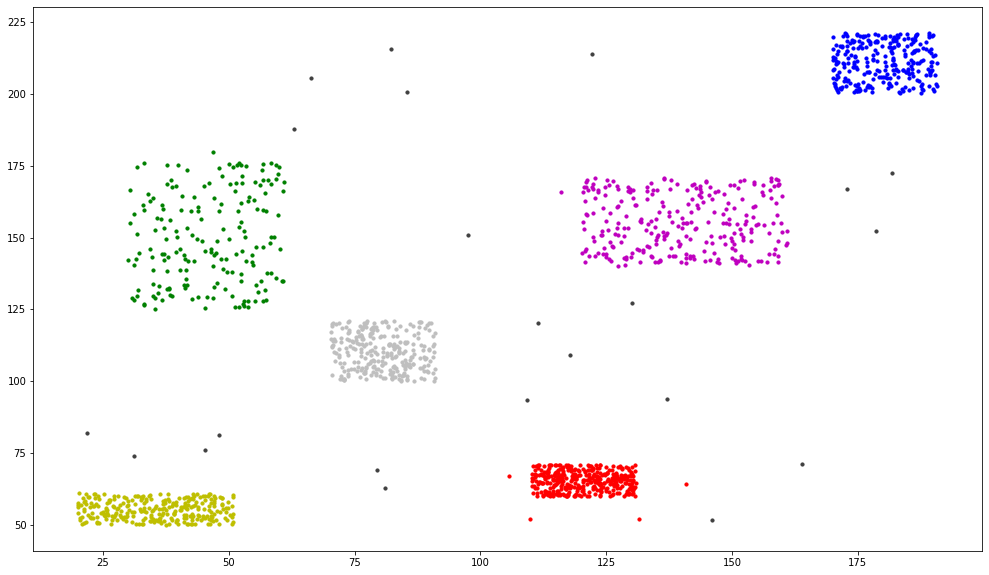

In [62]:
#Now DBSCAN
dbscan = DBSCAN(eps = 10, min_samples=20).fit(cluster_data)
clusters = dbscan.labels_
cluster_indexs = np.unique(clusters).tolist()
print(cluster_indexs)

fig, plots = plt.subplots()
colors = ['0.75','r', 'g', 'b', 'y', 'm','k', 'c','0.25']
for cluster_index in cluster_indexs :
    sub_set = np.array([cluster_data[i] for i in range(len(cluster_data)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])

Explanation:
Observe that for k-means, all noise data has been clubbed with a cluster, due to which the means have shifted. Nevertheless, even noise data sufficiently distant from other points of the cluster is clubbed in it. This is a disadvantage of the k-means algorithm, that it is very sensitive to outliers/noise!
On the other hand, observe in DBSCAN that only noise data significantly close to the original data clusters has been grouped together, while distant noise is clearly separated - this highlights the significant advantage DBSCAN has over k-means for noisy data.
Hence, for data with noise, DBSCAN is clearly a better clustering algorithm since it doesn't make much sense to group noise with regular data (disadvantage of k-means). 

## Question 4 - Frequent itemsets and association rules (15 points): 

(a) You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'applications' dataset by random sampling. Use one of the group member's student number as a seed.
 - After completing this preprocessing step, export your final dataset as 'applications_2.csv' dataset and use that for the next steps of the assignment.
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [2]:
# Your code

In [4]:
dataf = pd.read_csv('Data/applications.csv',sep=',')

In [5]:
dataf.head()

,A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag.1,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,...,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174
0,A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A_SUBMITTED,A_PARTLYSUBMITTED,A_DECLINED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A_SUBMITTED,A_PARTLYSUBMITTED,A_DECLINED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_CANCELLED,W_Completeren aanvraag,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
len(dataf)

13086

In [7]:
#fetching 90% of data randomly wirh seed matrikkel no of one of us
sample = dataf.sample(frac=0.9, replace=False, random_state=389902)
len(sample)

11777

In [8]:
sample = sample.sort_index()
sample.head()

,A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag.1,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,...,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174
0,A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A_SUBMITTED,A_PARTLYSUBMITTED,A_DECLINED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A_SUBMITTED,A_PARTLYSUBMITTED,A_DECLINED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_CANCELLED,W_Completeren aanvraag,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Exporting it
export_csv = sample.to_csv('Data/applications_2.csv', index = None, header=True)

(b) Find the most frequent itemsets with the support of more than 0.4 by using the Apriori algorithm (Hint: When you are creating rows to make the data_set, you should use none_empty strings).

In [10]:
repair_data = []
with open("Data/applications_2.csv") as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        repair_data.append(row)
        
#Show 3 first rows of repair_data

repair_data[0:3][:]

[['A_SUBMITTED',
  'A_PARTLYSUBMITTED',
  'A_PREACCEPTED',
  'W_Completeren aanvraag',
  'W_Completeren aanvraag.1',
  'A_ACCEPTED',
  'O_SELECTED',
  'A_FINALIZED',
  'O_CREATED',
  'O_SENT',
  'W_Nabellen offertes',
  'W_Completeren aanvraag.2',
  'W_Nabellen offertes.1',
  'W_Nabellen offertes.2',
  'W_Nabellen offertes.3',
  'W_Nabellen offertes.4',
  'W_Nabellen offertes.5',
  'O_SENT_BACK',
  'W_Valideren aanvraag',
  'W_Nabellen offertes.6',
  'W_Valideren aanvraag.1',
  'A_REGISTERED',
  'A_APPROVED',
  'O_ACCEPTED',
  'A_ACTIVATED',
  'W_Valideren aanvraag.2',
  'Unnamed: 26',
  'Unnamed: 27',
  'Unnamed: 28',
  'Unnamed: 29',
  'Unnamed: 30',
  'Unnamed: 31',
  'Unnamed: 32',
  'Unnamed: 33',
  'Unnamed: 34',
  'Unnamed: 35',
  'Unnamed: 36',
  'Unnamed: 37',
  'Unnamed: 38',
  'Unnamed: 39',
  'Unnamed: 40',
  'Unnamed: 41',
  'Unnamed: 42',
  'Unnamed: 43',
  'Unnamed: 44',
  'Unnamed: 45',
  'Unnamed: 46',
  'Unnamed: 47',
  'Unnamed: 48',
  'Unnamed: 49',
  'Unnamed: 50',

In [11]:
te = TransactionEncoder()
te_ary = te.fit(repair_data).transform(repair_data)
data = pd.DataFrame(te_ary, columns = te.columns_)
data.head(10)

,,A_ACCEPTED,A_ACTIVATED,A_APPROVED,A_CANCELLED,A_DECLINED,A_FINALIZED,A_PARTLYSUBMITTED,A_PREACCEPTED,A_REGISTERED,...,W_Nabellen offertes.1,W_Nabellen offertes.2,W_Nabellen offertes.3,W_Nabellen offertes.4,W_Nabellen offertes.5,W_Nabellen offertes.6,W_Valideren aanvraag,W_Valideren aanvraag.1,W_Valideren aanvraag.2,W_Wijzigen contractgegevens
0,False,True,True,True,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
1,True,True,True,True,False,False,True,True,True,True,...,False,False,False,False,False,False,True,False,False,False
2,True,True,True,True,False,False,True,True,True,True,...,False,False,False,False,False,False,True,False,False,True
3,True,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
6,True,False,False,False,False,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
7,True,False,False,False,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
8,True,False,False,False,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,True,True,True,True,False,...,False,False,False,False,False,False,True,False,False,False


In [12]:
# Your code
frequent_itemsets = apriori(data, min_support = 0.4, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.999830,()
1,0.583715,(A_DECLINED)
2,1.000000,(A_PARTLYSUBMITTED)
3,0.560961,(A_PREACCEPTED)
4,1.000000,(A_SUBMITTED)
5,0.560961,(W_Completeren aanvraag)
6,0.583715,"(, A_DECLINED)"
7,0.999830,"(, A_PARTLYSUBMITTED)"
8,0.560791,"(, A_PREACCEPTED)"
9,0.999830,"(, A_SUBMITTED)"


(c) Find the most frequent itemsets with the support of more than 0.4 by using the Apriori algorithm having more than 2 members.

In [13]:
# Your code
# Add another column named 'length' in 'frequent_itemsets' which indicates the number of items in each frequent itemset.

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Filter out the frequent itemsets which have a length longer than 2 and a support bigger than 0.4. 

# Store these found itemsets in variable 'frequent_itemsets_filtered'.

frequent_itemsets_filtered = frequent_itemsets.loc[(frequent_itemsets['length'] > 2) & (frequent_itemsets['support'] > 0.4)]   
frequent_itemsets_filtered

,support,itemsets,length
19,0.583715,"(, A_PARTLYSUBMITTED, A_DECLINED)",3
20,0.583715,"(, A_SUBMITTED, A_DECLINED)",3
21,0.560791,"(, A_PARTLYSUBMITTED, A_PREACCEPTED)",3
22,0.999830,"(, A_SUBMITTED, A_PARTLYSUBMITTED)",3
23,0.560791,"(, A_PARTLYSUBMITTED, W_Completeren aanvraag)",3
24,0.560791,"(, A_SUBMITTED, A_PREACCEPTED)",3
25,0.560791,"(, W_Completeren aanvraag, A_PREACCEPTED)",3
26,0.560791,"(, A_SUBMITTED, W_Completeren aanvraag)",3
27,0.583715,"(A_SUBMITTED, A_PARTLYSUBMITTED, A_DECLINED)",3
28,0.560961,"(A_SUBMITTED, A_PREACCEPTED, A_PARTLYSUBMITTED)",3


(d) Find the itemsets having min_confidence=0.3 and min_lift=1.2. Print support, confidence and lift of filtered rules in one table.

In [14]:
# Your code
# Mine association rules from the discovered frequent itemsets stored in variable 'frequent_itemsets', set minimum confidence to 0..

# Store the discovered rules in variable 'rules_association'.

rules_association =arule(frequent_itemsets, metric = 'confidence', min_threshold = 0.3)

# Filter out the rules with lift larger than 1.2, store the discovered rules in variable 'filtered_rules'.

filtered_rules = rules_association.loc[(rules_association['lift'] > 1.2)]     

# Show the columns 'antecedents', 'consequents', 'support', 'confidence' and 'lift' of variable 'filtered_rules' 

filtered_rules[['support', 'confidence', 'lift']]

,support,confidence,lift
22,0.560961,1.000000,1.782655
23,0.560961,1.000000,1.782655
62,0.560791,1.000000,1.782655
63,0.560791,1.000000,1.782655
66,0.560791,0.999697,1.782655
67,0.560791,0.999697,1.782655
86,0.560961,1.000000,1.782655
88,0.560961,1.000000,1.782655
89,0.560961,1.000000,1.782655
91,0.560961,1.000000,1.782655


## Question 5 - Text Mining (15 points)

Among the datasets given for this assignment you will find the files "pg_train" and "pg_test". These two files contain a labeled corpus, already splitted in training and test set.
The corpus consists of sentences from several novels, labeled with the name of the author. The first task is text classification: you will train a set of classifiers that predict the author of a piece of text.

(a) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a binary document-term matrix; train a logistic classifier with the author as target.

In [20]:
# Preprocessing

# Create stoplist
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
import string
from nltk.corpus import stopwords
stoplist = set(stopwords.words('english'))
import csv

def preprocess(file):
    authors = []
    sentences = []
    preprocessed_file = []
    for row in file:
        if(len(row)==1):
            author, text = row[0].split('#')
            authors.append(author)
            sentences.append(text)
    for sentence in sentences:
        #all lower case
        sentence = sentence.lower()
        #no punctuation + tokenization
        sentence = nltk.word_tokenize(sentence)
        sentence = [''.join(c for c in s if c not in string.punctuation) for s in sentence] #remove punctuations
        sentence = [s for s in sentence if s] #remove empty strings
        #stemming
        stemmer = nltk.PorterStemmer()
        for i in range(len(sentence)):
            sentence[i] = stemmer.stem(sentence[i])
        #stopword removal
        sentence = [w for w in sentence if not w in stoplist] 
        #join word list into str
        sentence = ' '.join(sentence)
        preprocessed_file.append(sentence)
    return authors,preprocessed_file
        
with open('Data/pg_train.csv', encoding = 'ISO-8859-1') as text_train_file:
    text_train_file = csv.reader(text_train_file, delimiter='\n')
    authors_train,preprocessed_text_train = preprocess(text_train_file)
with open('Data/pg_test.csv', encoding = 'ISO-8859-1') as text_test_file:
    text_test_file = csv.reader(text_test_file, delimiter='\n')
    authors_test,preprocessed_text_test = preprocess(text_test_file)

In [23]:
#binary document-term matrix
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
count_vect5a = CountVectorizer(binary=True)
X_train_counts5a = count_vect5a.fit_transform(preprocessed_text_train)
#print matrix
binary_mat = pd.DataFrame(X_train_counts5a.toarray(),columns=count_vect5a.get_feature_names())
print("Shape of binary document-term matrix: ",binary_mat.shape)
binary_mat.head()

Shape of binary document-term matrix:  (4499, 11801)


,000,10,11,119,12,13,1350,14,15,1599,...,zealou,zealous,zem,zigzag,zmite,zoetrop,zola,zoolog,zso,zumpt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#training
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

model5a = Pipeline([('vect', count_vect5a),  ('clf-logReg', LogisticRegression(verbose=1, solver='liblinear', C=5, penalty='l2'))])
model5a = model5a.fit(preprocessed_text_train, authors_train)


[LibLinear]

/home/yuchen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


(b) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a document-term matrix of counts; train a logistic classifier with the author as target.


In [25]:
# Your code
#document-term matrix of counts
count_vect5b = CountVectorizer()
X_train_counts5b = count_vect5b.fit_transform(preprocessed_text_train)

#training
model5b = Pipeline([('vect', count_vect5b),  ('clf-logReg', LogisticRegression(verbose=1, solver='liblinear', C=5, penalty='l2'))])
model5b = model5b.fit(preprocessed_text_train, authors_train)

/home/yuchen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[LibLinear]

(c) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a tf-idf scores document-term matrix; train a logistic classifier.


In [26]:
# Your code
#document-term matrix of counts
from sklearn.feature_extraction.text import TfidfVectorizer
tfid_vect = TfidfVectorizer()
X_train_counts5c = tfid_vect.fit_transform(preprocessed_text_train)

#training
model5c = Pipeline([('vect', tfid_vect),  ('clf-logReg', LogisticRegression(verbose=1, solver='liblinear', C=5, penalty='l2'))])
model5c = model5c.fit(preprocessed_text_train, authors_train)

[LibLinear]

/home/yuchen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


(d) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a doc2vec embedding in order to reduce the dimension of the document vector to 300; use the doc2vec model you just trained to convert the training set to a set of document vectors; train a logistic classifier with the author as target.


In [27]:
# Your code
import gensim
from gensim.models import Doc2Vec
from tqdm import tqdm
from sklearn import utils

train_5d = []
test_5d = []

for i in range(0, len(preprocessed_text_train)):
    train_5d.append(gensim.models.doc2vec.TaggedDocument(words=gensim.utils.simple_preprocess(preprocessed_text_train[i]), tags=[authors_train[i]]))
for i in range(0, len(preprocessed_text_test)):
    test_5d.append(gensim.models.doc2vec.TaggedDocument(words=gensim.utils.simple_preprocess(preprocessed_text_test[i]), tags=[authors_test[i]]))

model5d1 = Doc2Vec(vector_size=300, negative=5, min_count=2,  workers=1)
model5d1.build_vocab([x for x in tqdm(train_5d)])

# Traning doc2vec
for epoch in range(30):
    model5d1.train(utils.shuffle([x for x in tqdm(train_5d)]), total_examples=len(train_5d), epochs=1)
    model5d1.alpha -= 0.002
    model5d1.min_alpha = model5d1.alpha

100%|██████████| 4499/4499 [00:00<00:00, 2479980.77it/s]


In [28]:
# Building the feature vector for the classifier
def vec_for_learning(model, docs):
    doc2vec_vectors = [model.infer_vector(doc.words) for doc in docs]
    targets = [doc.tags[0] for doc in docs]
    return doc2vec_vectors, targets
# Translating docs into vectors for training and test set
X_train, y_train = vec_for_learning(model5d1, train_5d)
X_test, y_test = vec_for_learning(model5d1, test_5d)
# Training
model5d2 = LogisticRegression()
model5d2.fit(X_train,y_train)

/home/yuchen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yuchen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

(e) Predict the classification with the four models on the test data.

In [29]:
# Your code
y_pred5a = model5a.predict(preprocessed_text_test)

y_pred5b = model5b.predict(preprocessed_text_test)

y_pred5c = model5c.predict(preprocessed_text_test)

y_pred5d = model5d2.predict(X_test)

(f) Obtain confusion matrices for the four different models.


In [30]:
# Your code
from sklearn.metrics import confusion_matrix
print("confusion matrix for model 1")
print(confusion_matrix(authors_test, y_pred5a))
print("confusion matrix for model 2")
print(confusion_matrix(authors_test, y_pred5b))
print("confusion matrix for model 3")
print(confusion_matrix(authors_test, y_pred5c))
print("confusion matrix for model 4")
print(confusion_matrix(y_test, y_pred5d))

confusion matrix for model 1
[[682   4   3]
 [ 15 494   6]
 [  0   0 301]]
confusion matrix for model 2
[[680   5   4]
 [ 17 493   5]
 [  2   0 299]]
confusion matrix for model 3
[[682   6   1]
 [  9 505   1]
 [  0   2 299]]
confusion matrix for model 4
[[627  36  26]
 [ 49 440  26]
 [ 45  21 235]]


(g) Obtain accuracy and f1-score for the four different models.


In [31]:
# your code

from sklearn.metrics import accuracy_score, f1_score

print ('model 1 \naccuracy: %s' % accuracy_score(authors_test, y_pred5a))
print ('f1 score: {}'.format(f1_score(authors_test, y_pred5a, average='weighted')))

print ('model 2 \naccuracy: %s' % accuracy_score(authors_test, y_pred5b))
print ('f1 score: {}'.format(f1_score(authors_test, y_pred5b, average='weighted')))

print ('model 3 \naccuracy: %s' % accuracy_score(authors_test, y_pred5c))
print ('f1 score: {}'.format(f1_score(authors_test, y_pred5c, average='weighted')))

print ('model 4 \naccuracy: %s' % accuracy_score(y_test, y_pred5d))
print ('f1 score: {}'.format(f1_score(y_test, y_pred5d, average='weighted')))

model 1 
accuracy: 0.9813953488372092
f1 score: 0.9813421952763548
model 2 
accuracy: 0.9780730897009967
f1 score: 0.9780315801703386
model 3 
accuracy: 0.987375415282392
f1 score: 0.9873714847011774
model 4 
accuracy: 0.8651162790697674
f1 score: 0.8645790948954932


(h) Briefly comment on the quality of the predictions for the four models.

Explanation:
All the four models can make very good predictions; The model with tf-idf scores document-term matrix has the best prediction accuracy among all models, while the doc2vec model gives a relatively less accurate prediction.

(i) For the two authors Austen and Chesterton separately, build a bigram language model. You should use both training and test data to build the model. Do not perform stemming or stopword removal for this task, but do use the other preprocessing steps described in (a). Use both right and left padding, and manage unknown terms by using a dedicated token.

In [32]:
# Your code
#preprocessing
def preprocess_bigram(file):
    authors = []
    sentences = []
    preprocessed_file = []
    for row in file:
        if(len(row)==1):
            author, text = row[0].split('#')
            authors.append(author)
            sentences.append(text)
    for sentence in sentences:
        #all lower case
        sentence = sentence.lower()
        #no punctuation + tokenization
        sentence = nltk.word_tokenize(sentence)
        sentence = [''.join(c for c in s if c not in string.punctuation) for s in sentence] #remove punctuations
        sentence = [s for s in sentence if s] #remove empty strings
        preprocessed_file.append(sentence)
    return authors,preprocessed_file

with open('Data/pg_train.csv', encoding = 'ISO-8859-1') as text_train_file:
    text_train_file = csv.reader(text_train_file, delimiter='\n')
    authors_train_bigram,preprocessed_text_train_bigram = preprocess_bigram(text_train_file)
with open('Data/pg_test.csv', encoding = 'ISO-8859-1') as text_test_file:
    text_test_file = csv.reader(text_test_file, delimiter='\n')
    authors_test_bigram,preprocessed_text_test_bigram = preprocess_bigram(text_test_file)

In [33]:
#generating training and testing dataset for two authors Austen and Chesterton

from nltk import word_tokenize
Austen_train=[]
Austen_test=[]
Chesteron_train=[]
Chesteron_test=[]
for i in range(0,len(authors_train_bigram)):
    if authors_train_bigram[i] == 'austen':
        Austen_train.append(preprocessed_text_train_bigram[i])
    if authors_train_bigram[i] == 'chesterton':
        Chesteron_train.append(preprocessed_text_train_bigram[i])
for i in range(0,len(authors_test_bigram)):
    if authors_test_bigram[i] == 'austen':
        Austen_test.append(preprocessed_text_test_bigram[i])
    if authors_test_bigram[i] == 'chesterton':
        Chesteron_test.append(preprocessed_text_test_bigram[i])
print("size of train and test sets:\n",len(Austen_train),len(Chesteron_train),len(Austen_test),len(Chesteron_test))

size of train and test sets:
 2062 1541 689 515


In [34]:
#creating bigram
from nltk.lm.preprocessing import padded_everygram_pipeline
Austen_train_bigram,Austen_train_voc  = padded_everygram_pipeline(2,Austen_train)
Chesteron_train_bigram,Chesteron_train_voc  = padded_everygram_pipeline(2,Chesteron_train)
Austen_test_bigram,Austen_test_voc  = padded_everygram_pipeline(2,Austen_test)
Chesteron_test_bigram,Chesteron_test_voc  = padded_everygram_pipeline(2,Chesteron_test)
# for i in Austen_train_bigram:
#     print(len(list(i)))
# list(Austen_train_voc)

In [35]:
#training bigram model
from nltk.lm import MLE
Austen_model = MLE(2) 
Austen_model.fit(Austen_train_bigram,Austen_train_voc)
Austen_model.fit(Austen_test_bigram,Austen_test_voc)
Chesteron_model = MLE(2)
Chesteron_model.fit(Chesteron_train_bigram,Chesteron_train_voc)
Chesteron_model.fit(Chesteron_test_bigram,Chesteron_test_voc)

(j) For each author, use the correspondent language models from (i) to generate, using MLE, a sentence of fifteen words starting from each of the following terms:

In [36]:
# 'She'
# 'They'
# 'It'
print('Austen model: \nShe',Austen_model.generate(15,text_seed=['she']))
print('They',Austen_model.generate(15,text_seed=['they']))
print('It',Austen_model.generate(15,text_seed=['it']))
print('Chesteron model: \nShe',Chesteron_model.generate(15,text_seed=['she']))
print('They',Chesteron_model.generate(15,text_seed=['they']))
print('It',Chesteron_model.generate(15,text_seed=['it']))

Austen model: 
She ['wanted', 'to', 'bring', 'herself', 'in', 'the', 'extent', 'of', 'justice', 'this', 'house', 'as', 'bath', 'so', 'essential']
They ['will', 'be', 'the', 'other', 'component', 'parts', 'so', 'i', 'am', 'at', 'so', 'well', 'at', 'the', 'sight']
It ['and', 'a', '<UNK>', 'elinor', 's', 'dependence', 'you', 'can', 'be', 'as', 'they', 'quitted', 'the', 'door', 'were']
Chesteron model: 
She ['said', 'the', 'vehicle', 'in', 'the', 'other', 'was', 'really', 'fine', 'about', 'anarchists', 'upon', 'the', 'hamlet', 'of']
They ['looked', 'at', 'all', 'while', 'instinctively', 'for', 'her', 'she', 'ever', 'deny', 'your', 'empire', 'on', 'to', 'address']
It ['let', 'in', 'expressing', 'rather', 'closer', 'he', 'looked', 'up', 'like', 'a', 'pike', 'staff', 'like', 'that', 'they']


(k) Now, computer another two models (for Austen and Chesterton separately), build a trigram model with the same data as in (i). Use both right and left padding, and manage unknown terms by using a dedicated token.

In [37]:
# Your code
Austen_train_tri,Austen_train_voc_tri  = padded_everygram_pipeline(3,Austen_train)
Chesteron_train_tri,Chesteron_train_voc_tri  = padded_everygram_pipeline(3,Chesteron_train)
Austen_test_tri,Austen_test_voc_tri  = padded_everygram_pipeline(3,Austen_test)
Chesteron_test_tri,Chesteron_test_voc_tri  = padded_everygram_pipeline(3,Chesteron_test)

Austen_model_tri = MLE(3) 
Austen_model_tri.fit(Austen_train_tri,Austen_train_voc_tri)
Austen_model_tri.fit(Austen_test_tri,Austen_test_voc_tri)
Chesteron_model_tri = MLE(3)
Chesteron_model_tri.fit(Chesteron_train_tri,Chesteron_train_voc_tri)
Chesteron_model_tri.fit(Chesteron_test_tri,Chesteron_test_voc_tri)

(l) For each author, use the correspondent language models from (k) to generate, using MLE, a sentence of fifteen words starting from each of the same terms as question (j):

In [38]:
# Your code
print('Austen model trigram: \nShe',Austen_model_tri.generate(15,text_seed=['she']))
print('They',Austen_model_tri.generate(15,text_seed=['they']))
print('It',Austen_model_tri.generate(15,text_seed=['it']))
print('Chesteron model: \nShe',Chesteron_model_tri.generate(15,text_seed=['she']))
print('They',Chesteron_model_tri.generate(15,text_seed=['they']))
print('It',Chesteron_model_tri.generate(15,text_seed=['it']))

Austen model trigram: 
She ['never', 'heard', 'any', 'thing', 'and', 'another', 'and', 'when', 'he', 'came', 'back', 'again', 'presently', 'edward', 'returned']
They ['ought', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>']
It ['was', 'poor', 'and', 'miserable', 'i', 'am', 'ruined', 'for', 'ever', 'in', 'their', 'lives', 'and', 'i', 'shall']
Chesteron model: 
She ['was', 'clad', 'in', 'tweeds', 'not', 'odd', 'save', 'for', 'civilities', 'till', 'they', 'were', 'conspirators', 'i', 'mean']
They ['ve', 'been', 'sent', 'off', 'at', 'a', 'picnic', 'he', 'had', 'a', 'pair', 'of', 'blades', 'and', 'taking']
It ['is', 'impossible', 'and', 'i', 'have', 'cause', 'to', 'complain', 'and', 'we', 'had', 'all', 'the', 'abrupt', 'disturbance']


(m) Comment on the quality of the models and generated text. Which model performs better? In general, which differences are there in using trigrams as opposed to bigrams?

Explanation:
From our observation, trigram generates more reasonable sentences: in bigram there are more likely to be grammar mistakes like "They suddenly and a long silence". And in trigram sentences are sometimes more likely to end up with `'</s>', '</s>', '</s>', '</s>'`... earlier than bigram.
When using trigram, a bigger context is considered than bigram, and it covers all the information that bigram have. Thus, trigram should perform better than bigram. But training a trigram takes more time than bigram, and since it has bigger grams and larger gram sizes, it also consumes more memory.

## Question 6 - Process Mining (15 points)
For this part, refer to the online docs of pm4py (https://pm4py.fit.fraunhofer.de/).
Important: if you did not do it in the instruction, you should make sure to have the latest pm4py version: to get it is sufficient to type `pip install pm4py --upgrade`.
In this section of the assignment you will be working with a real life event log, derived from the activity of the help desk department of an Italian software company. The data is contained in the file "event_log.xes".

(a) Use the provided event log and identify the least frequent variant and the most frequent variant.


In [40]:
# Your code
from pm4py.objects.log.importer.xes import factory as xes_importer
from pm4py.statistics.traces.log import case_statistics

event_log = xes_importer.import_log('Data/event_log.xes')
variants_count = case_statistics.get_variant_statistics(event_log)
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)
least_frequent_variant = variants_count[-1]['variant']
most_frequent_variant = variants_count[0]['variant']
print('least frequent variant:',least_frequent_variant,'\nmost frequent variant:',most_frequent_variant)

least frequent variant: Assign seriousness,Assign seriousness,Assign seriousness,Assign seriousness,Resolve ticket,Take in charge ticket,Resolve ticket,Closed 
most frequent variant: Assign seriousness,Take in charge ticket,Resolve ticket,Closed


(b) Remove all the variants that contain less than 1% of the traces in the log. Create a new event log without these variants.

In [41]:
# Your code
from pm4py.algo.filtering.log.variants import variants_filter
trace_count_sum = 0
for trace in variants_count:
    trace_count_sum = trace_count_sum + trace['count']
print('before filtering:',trace_count_sum)
infrequent_variants = []
for trace in variants_count:
    if trace['count']<trace_count_sum*0.01:
        infrequent_variants.append(trace['variant'])
event_log_new = variants_filter.apply(event_log,infrequent_variants, parameters={"positive": False})
print('after filtering:',len(event_log_new))

before filtering: 4580
after filtering: 3811


(c) Use Inductive miner algorithm to discover the process model based on you new event log (the filtered log without the infrequent variants of question (b)).


In [82]:
# Your code
from pm4py.algo.discovery.inductive import factory as inductive_miner
net, initial_marking, final_marking = inductive_miner.apply(event_log_new)

(d) Perform the token replay conformance checking using your discovered model (c) and the original event log. Does your process model fit the log?


In [83]:
# Your code
from pm4py.algo.conformance.tokenreplay import factory as token_based_replay_factory
from pm4py.objects.conversion.process_tree import factory as tree_petri_converter
token_replay_result_origin = token_based_replay_factory.apply(event_log, net, initial_marking, final_marking)
print('\nsample1: \n',token_replay_result_origin[0])
print('\nsample2: \n',token_replay_result_origin[1])
count=0
for check in token_replay_result_origin:
    if check['trace_is_fit']!=True:
        count = count+1
print('\nnumber of traces which do not fit:',count)


sample1: 
 {'trace_is_fit': False, 'trace_fitness': 0.9375, 'activated_transitions': [skip_1, init_loop_2, Assign seriousness, skip_5, init_loop_6, tauSplit_8, Take in charge ticket, Take in charge ticket, init_loop_10, Resolve ticket, skip_13, tauJoin_9, skip_16, Closed], 'reached_marking': ['p_17:1', 'sink:1'], 'enabled_transitions_in_marking': set(), 'transitions_with_problems': [Take in charge ticket], 'missing_tokens': 1, 'consumed_tokens': 16, 'remaining_tokens': 1, 'produced_tokens': 16}

sample2: 
 {'trace_is_fit': True, 'trace_fitness': 1.0, 'activated_transitions': [skip_1, init_loop_2, Assign seriousness, skip_5, init_loop_6, tauSplit_8, Take in charge ticket, init_loop_10, Resolve ticket, skip_13, tauJoin_9, skip_16, Closed], 'reached_marking': ['sink:1'], 'enabled_transitions_in_marking': set(), 'transitions_with_problems': [], 'missing_tokens': 0, 'consumed_tokens': 15, 'remaining_tokens': 0, 'produced_tokens': 15}

number of traces which do not fit: 1591


Explanation: It is hard to say in general. As is shown in the print, for some traces they fit, while there are some other traces which don't fit.


(e) Calculate the fitness of the model in (c).

In [84]:
# Your code
from pm4py.evaluation.replay_fitness import factory as replay_fitness_factory

fitness_tokenbasedreplay_origin = replay_fitness_factory.apply(event_log, net, initial_marking, final_marking)
print(fitness_tokenbasedreplay_origin)

{'percFitTraces': 62.99126637554585, 'averageFitness': 0.9387764189103065}


(f) Are there any deviations between the process model and the event log? If so, where and why?

Explanation:
Yes, there deviations between the process model and the event log, as we can already see not all traces fit the model. Firstly, the tree is trained on filtered event_log, which don't contain all the information; Secondly because the event log provided is from the activity of the help desk department of an Italian software company, it may contain some very complex traces or some special cases(outliers), which can have some influence on the model we train when we do a top-down discovery approach.

(g) Now use the original event log and remove the two most frequent variants, and discover the model based on your new event log (the filtered log without two most frequent variants).


In [87]:
# Your code
two_most_frequent = [variants_count[0]['variant'],variants_count[1]['variant']]
event_log_g = variants_filter.apply(event_log,two_most_frequent, parameters={"positive": False})
net2, initial_marking2, final_marking2 = inductive_miner.apply(event_log_g)

(h) Perform the token replay conformance checking using the newly discovered model of question (g) and the original event log. Does your process model fit the log?

In [90]:
# Your code
token_replay_result_h = token_based_replay_factory.apply(event_log, net2, initial_marking2, final_marking2)
count=0
for check in token_replay_result_h:
    if check['trace_is_fit']!=True:
        count = count+1
print('number of traces which do not fit:',count)

number of traces which do not fit: 376


Explanation:
There are 376 traces which do not fit the model.

(i) Calculate the fitness of the model in (g).

In [91]:
# Your code
fitness_tokenbasedreplay_i = replay_fitness_factory.apply(event_log, net2, initial_marking2, final_marking2)
print('\nafter filtering:\n',fitness_tokenbasedreplay_i)


after filtering:
 {'percFitTraces': 0.2183406113537118, 'averageFitness': 0.752955974156862}


(j) Are there any deviations in the process model? If so, where and why?

Explanation:Yes. The reasons are similar as mentioned in question(f), and this model is trained based on even less data, so it cannot playback the traces.

(k) Use the complete event log (original event log) and discover your process model using Inductive Miner.


In [92]:
# Your code
net3, initial_marking3, final_marking3 = inductive_miner.apply(event_log)

(l) Do the token replay conformance checking using your newly discovered model and the original event log. Does your process model fit the log?

In [93]:
# Your code
token_replay_result_l = token_based_replay_factory.apply(event_log, net3, initial_marking3, final_marking3)
count=0
for check in token_replay_result_l:
    if check['trace_is_fit']!=True:
        count = count+1
print('number of traces:',len(event_log))
print('number of traces which do not fit:',count)

number of traces: 4580
number of traces which do not fit: 376


In [94]:
fitness_tokenbasedreplay_l = replay_fitness_factory.apply(event_log, net3, initial_marking3, final_marking3)
print('\nafter filtering:\n',fitness_tokenbasedreplay_l)


after filtering:
 {'percFitTraces': 0.2183406113537118, 'averageFitness': 0.752955974156862}


Explanation:No, same as in h.

(m) How are these three discovered process models different from each other? Which model is the best fitting to the original log? Why?

Explanation:
The first model is built using data without the least infrequent variants, the second process model is built using data without the first two most frequents variants, the third process model is built using event logs.After comparing the fitness, we can find out that the second and third model has performs bad, while the first model have good fitness.

(n) Visualize the model discovered in question (k) enriched with frequency information. Subsequently, visualize that same model enriched with performance information.

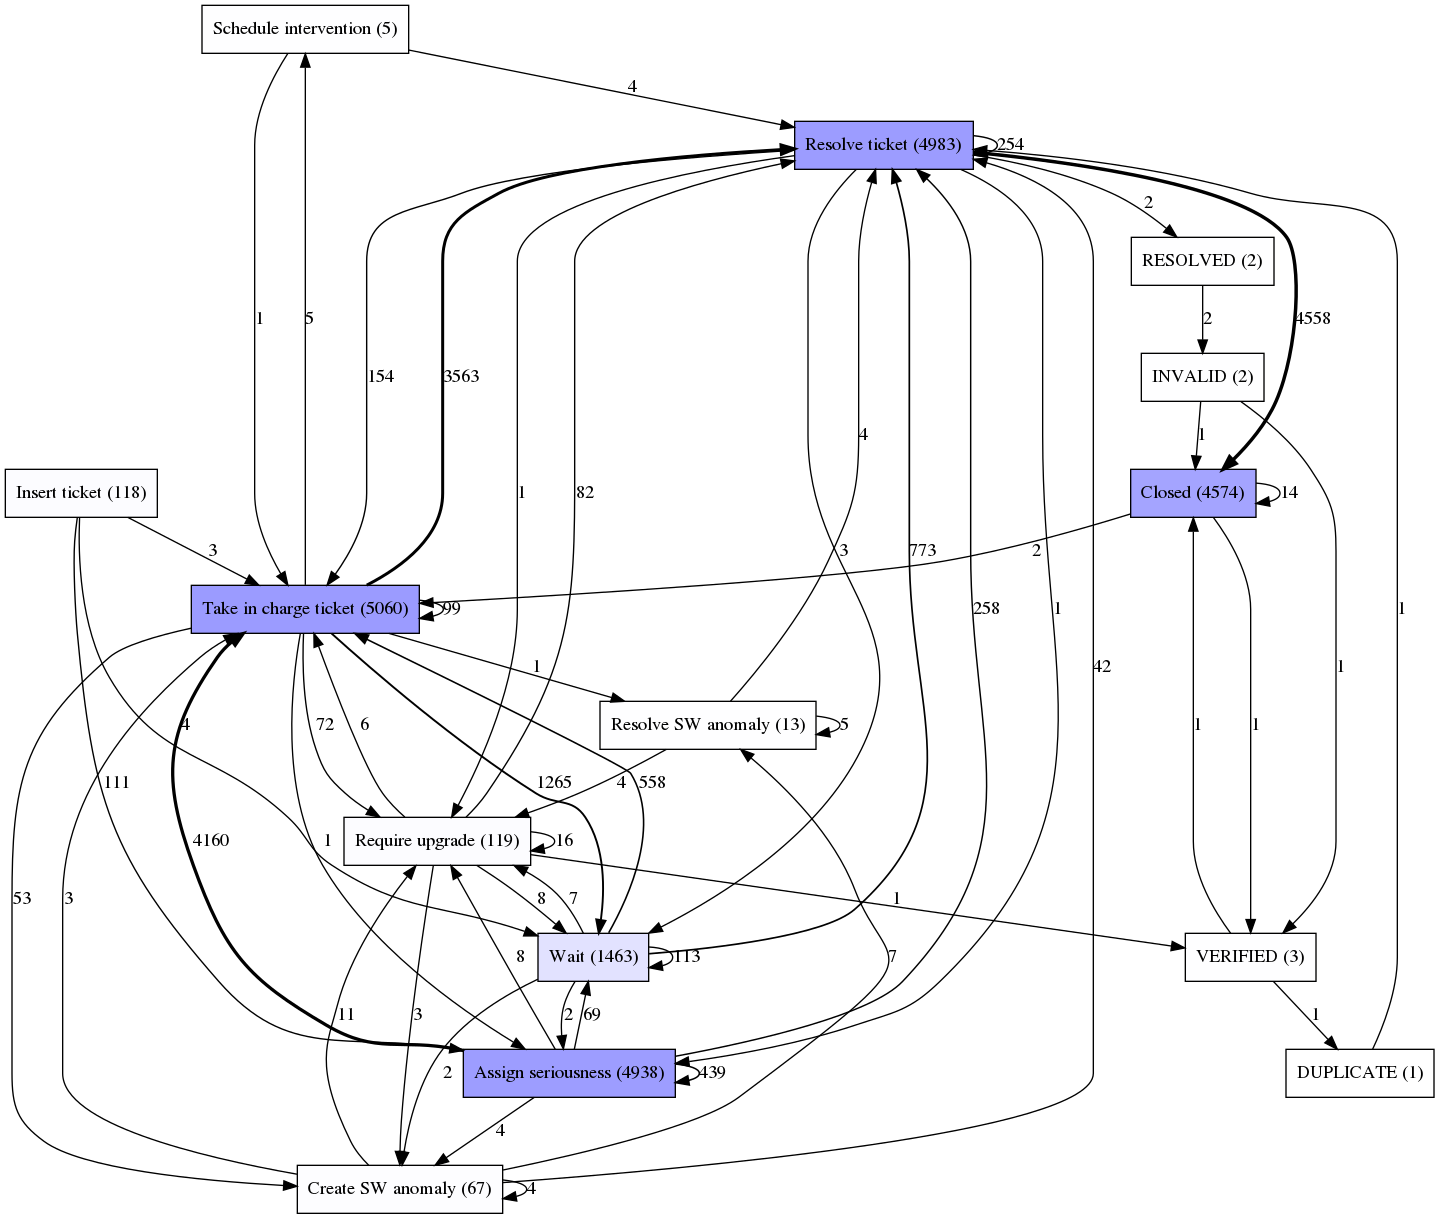

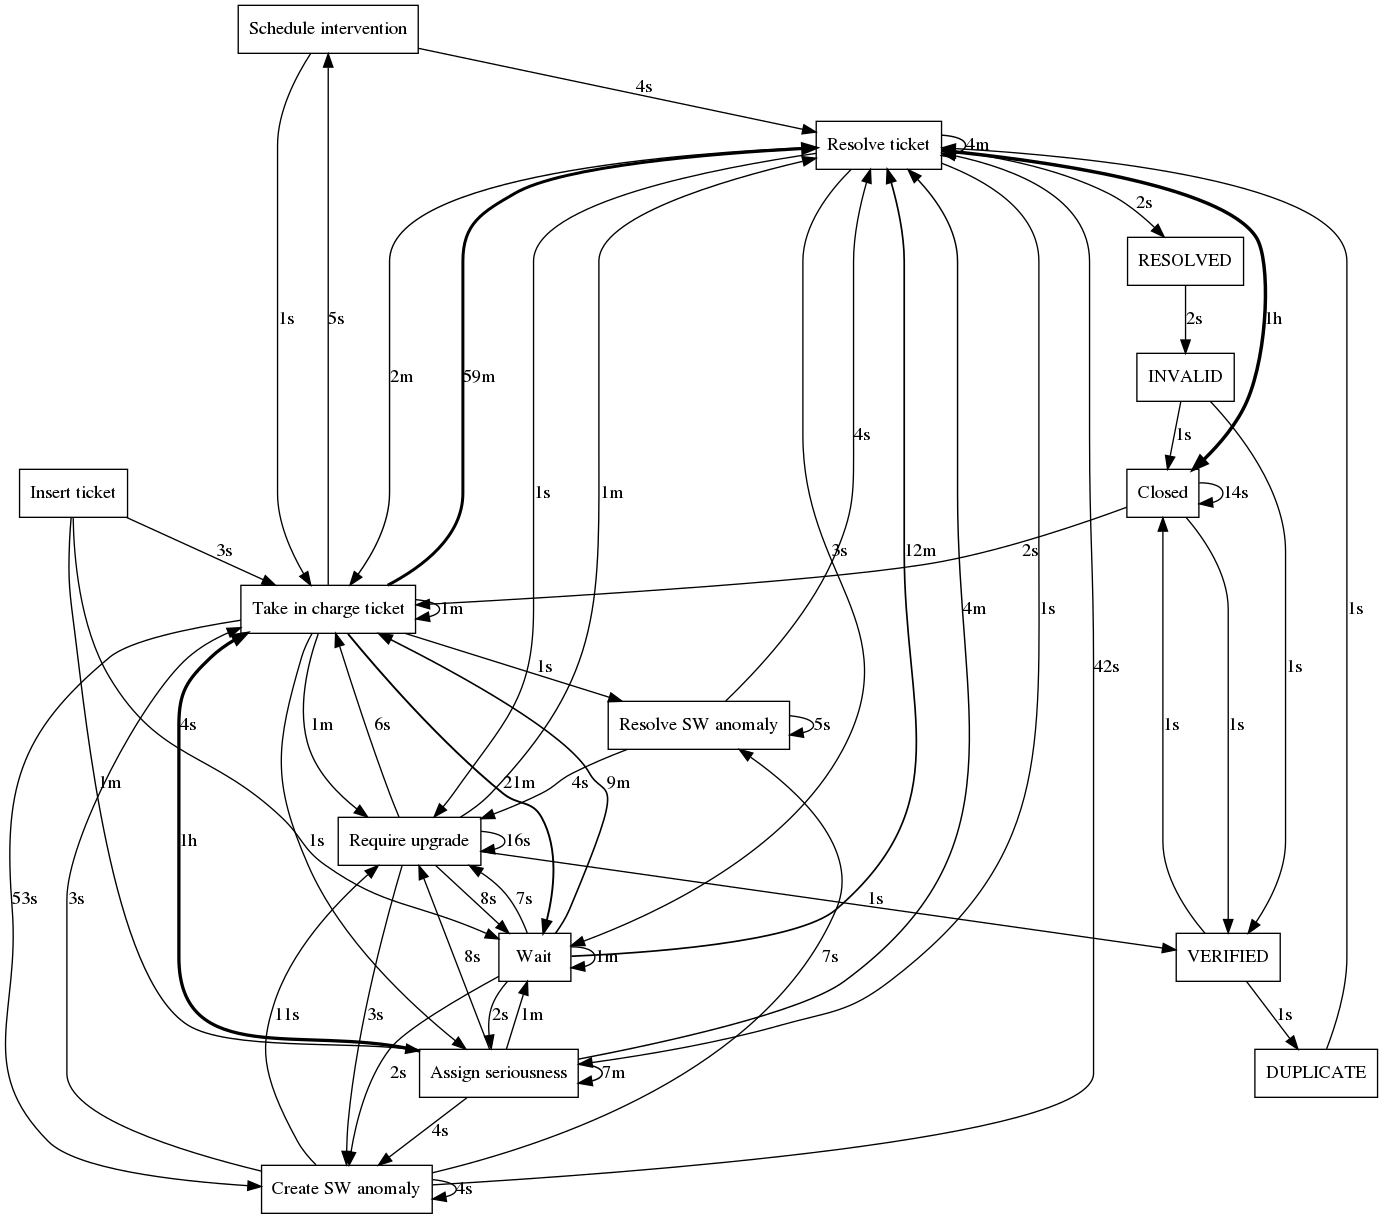

In [68]:
# Your code
from pm4py.algo.discovery.dfg import factory as dfg_factory
from pm4py.visualization.dfg import factory as dfg_vis_factory
dfg = dfg_factory.apply(event_log)
gviz_dfg = dfg_vis_factory.apply(dfg, log=event_log, variant='frequency')
dfg_vis_factory.view(gviz_dfg)
gviz_dfg = dfg_vis_factory.apply(dfg, log=event_log, variant='performance')
dfg_vis_factory.view(gviz_dfg)

(o) If you were the process owner and you had more resources to hire employees, on which parts of the process would you assign them to maximize efficiency?

Explanation:
 Assign seriousness, take in charge ticket, resolve ticket, closed. The process between these activities take rather long time. With more efficiency the whole process can take less time.

(p) Add your further comments and considerations on the frequency and performance informations. Does the process have a "happy path", and is it shown in the enhanced process models? Where are the major bottlenecks in this process? Is there any rework?

Explanation:Yes, the happy path is the path which most cases follow, which are the thick lines. The bottlenecks are also on the happy path, because they all take a long time. For create SW anomaly, assign seriousness,wait, require update,take in charge ticket,resolve ticket,resolve SW anomaly, closed there are rework.